In [1]:
import json
import io 
import IPython.display
import os 
import base64
import numpy as np
%pylab inline
import shutil


Populating the interactive namespace from numpy and matplotlib


In [2]:
## definition statement, helper functions

def terminalUnfuck(string):
    newString = string.replace(" ", "\ ")
    newString = newString.replace("(", "\(" )
    newString = newString.replace(")", "\)" )
    return newString
                               

def getx(p):
    
    return p[u'x']

def gety(p):
    return p[u'y']

def plotstroke(onestroke,onecolor):
    #print onestroke
    xs = map(getx,onestroke)
    ys = map(gety,onestroke)
    ## draw dots where the child's touched the screen up to now
    ySizeOfImage = 500
    xSizeOfImage = 500
    plot(xs,ys, 
      lw = 3, color = onecolor)
    axis('off')
    yticks([])
    xticks([])
    xlim(0,xSizeOfImage)
    ylim(0,ySizeOfImage)

#ray
def plotstroke_new(ax,onestroke,onecolor,file_ind, outputDirectory):
    #print onestroke
    xs = map(getx,onestroke)
    ys = map(gety,onestroke)
    ySizeOfImage = 500
    xSizeOfImage = 500
    assert(len(xs) == len(ys))
    for i in range(len(xs)):
        x, y = xs[:i], ys[:i]
        ax.plot(x,y,lw=3, color=onecolor)
#         yticks([])
#         xticks([])
#         xlim(0,xSizeOfImage)
#         ylim(0,ySizeOfImage)
#         show()
#        savefig('/Users/cocosci/Desktop/ray_out/%02d_%03d_%s' %(file_ind, i, onecolor))
# this works below 
        savefig(outputDirectory + 'image%02d_%03d' %(file_ind, i))
#        savefig('/Users/cocosci/Desktop/ray_out/image%02d' %(i)) 

def flatList(l):
    return [item for sublist in l for item in sublist]

def makeimage(letter, outputDirectory):

    strokeColors = ["blue","red","green","yellow","magenta","black"]
    strokes = letter[u'strokes']
    f = figure() # ray
    ax = f.gca() # ray
    yticks([])
    xticks([])
    xlim(0,500)
    ylim(0,500)
    allX = []
    allY = []
    for i in range(len(strokes)):
        color = strokeColors[i]
        stroke = strokes[i]
        xs = map(getx, stroke)
        ys = map(gety, stroke)
        allX.append(xs)
        allY.append(ys)
        plotstroke_new(ax, stroke,color,i, outputDirectory) 
    allX = flatList(allX)
    allY = flatList(allY)
    jointXY = array([allX, allY]).transpose()
    savetxt(outputDirectory + "data.csv", jointXY, delimiter=",")
   


In [3]:
dataFolder = '/Users/cocosci/Dropbox (MIT)/LETTERS_JBT/Final expereiment/GH_Data/'
fp = io.open('/Users/cocosci/Dropbox (MIT)/LETTERS_JBT/Final expereiment/GH_Data/11_11_16/Part12_Draw.json')
d = json.load(fp)
directoryToImages = "/Users/cocosci/Desktop/ray_out/"
allDataFolder = dataFolder + "allData"
outputFolder = dataFolder + "allOutput/"

In [4]:
def getdata(f):
    fp = io.open(f)
    return json.load(fp)

0 .DS_Store
0 1 2 3 4 5 6 7 1 Part11_Draw.json
0 1 2 3 4 5 6 7 2 Part11_Trace.json
0 1 2 3 4 5 6 7 3 Part12_Draw.json
0 1 2 3 4 5 6 7 4 Part12_Trace.json
0 1 2 3 4 5 6 7 5 part13_Draw.json
0 1 2 3 4 5 6 7 6 Part13_Trace.json
0 1 2 3 4 5 6 7 7 Part14_Draw.json
0 1 2 3 4 5 6 7 8 Part14_Trace.json
0 1 2 3 4 5 6 7 9 Part15_Draw.json
0 1 2 3 4 5 6 7 10 Part15_Trace.json
0 1 2 3 4 5 6 7 11 Part16_Draw.json
0 1 2 3 4 5 6 7 12 Part16_Trace.json
0 1 2 3 4 5 6 7 13 Part27_Draw.json
0 1 2 3 4 5 6 7 14 Part27_Trace.json
0 1 2 3 4 5 6 7 15 Part28_Trace.json
0 1 2 3 4 5 6 7 16 Part29_Draw.json
0 1 2 3 4 5 6 7 17 Part30_Draw.json
0 1 2 3 4 5 6 7 18 Part31_Draw.json
0 1 2 3 4 5 6 7 19 Part32_Draw.json
0 1 2 3 4 5 6 7 20 Part32_Trace.json
0 1 2 3 4 5 6 7 21 Part33_Draw.json
0 1 2 3 4 5 6 7 22 Part33_Trace.json
0 1 2 3 4 5 6 7 23 Part34_Draw.json
0 1 2 3 4 5 6 7 24 Part34_Trace.json
0 1 2 3 4 5 6 7 25 Part35_Draw.json
0 1 2 3 4 5 6 7 26 Part35_Trace.json
0 1 2 3 4 5 6 7 27 Part36_Draw.json
0 1 2 3 4 5 6

/Users/cocosci/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


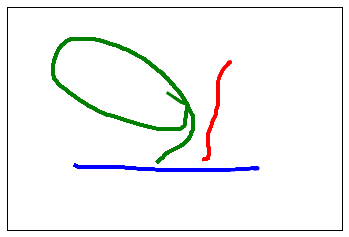

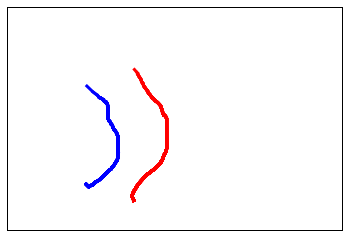

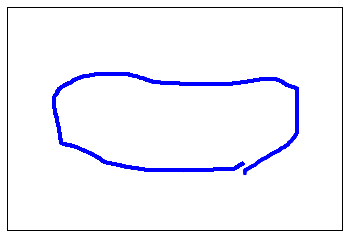

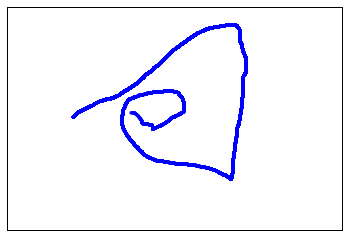

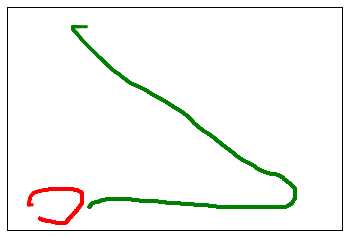

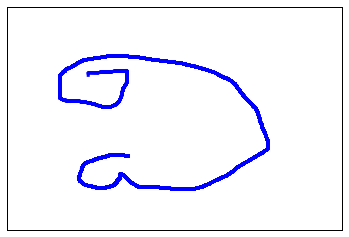

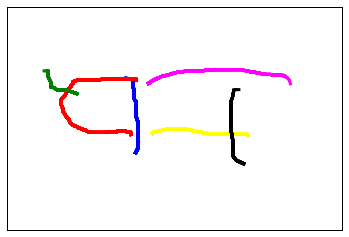

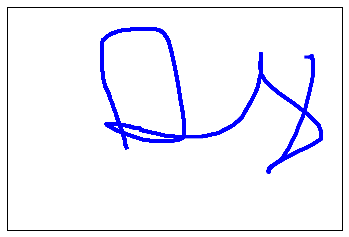

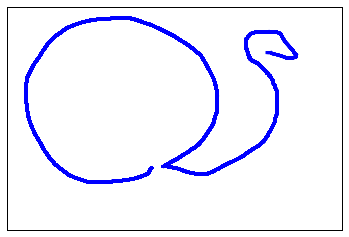

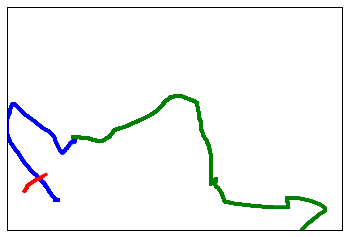

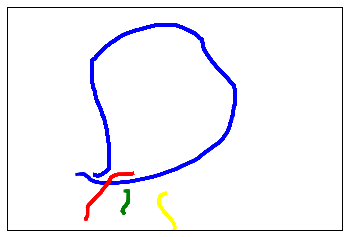

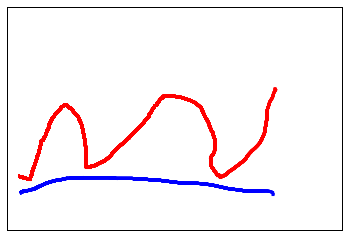

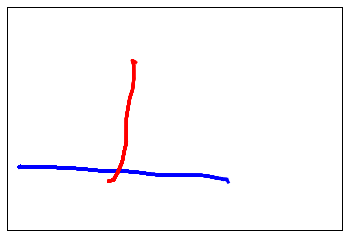

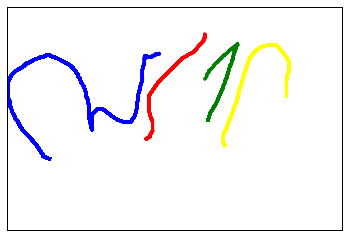

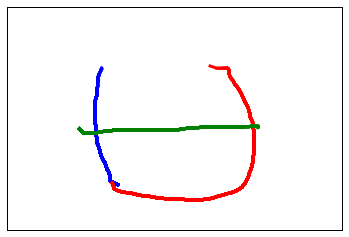

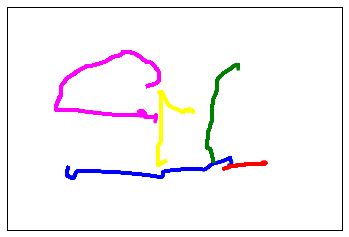

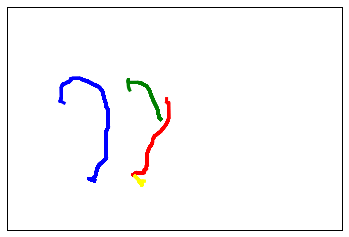

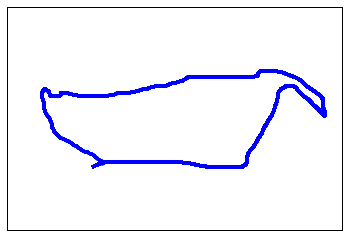

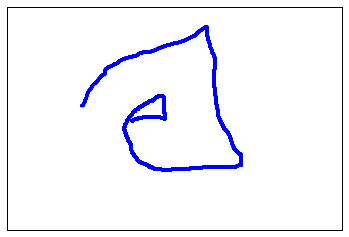

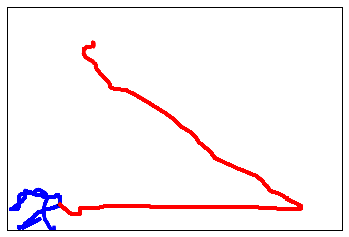

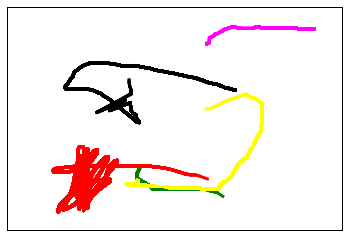

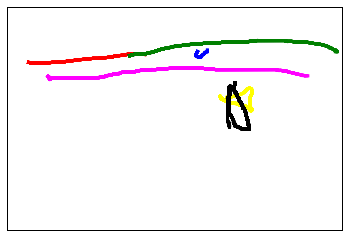

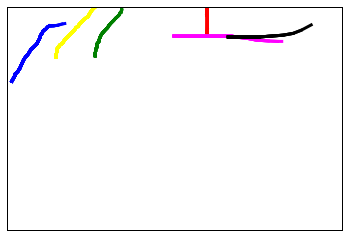

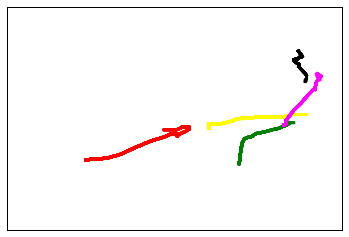

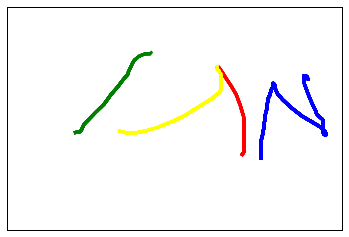

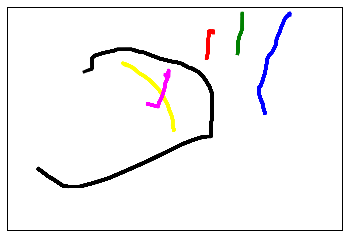

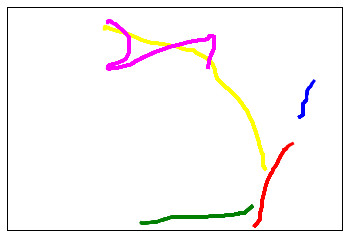

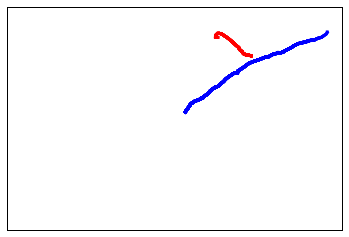

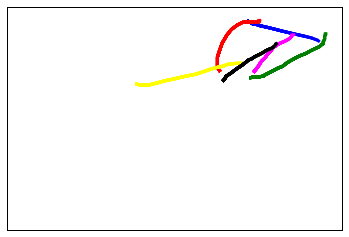

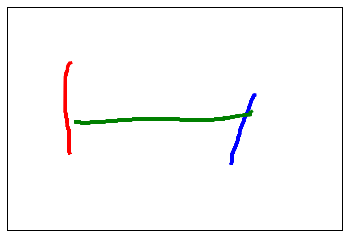

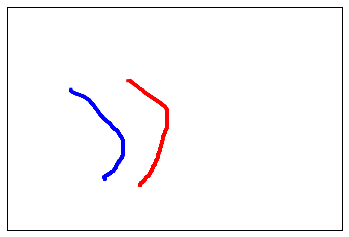

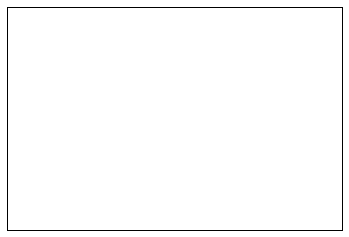

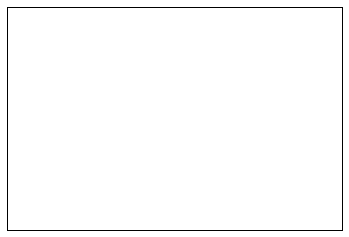

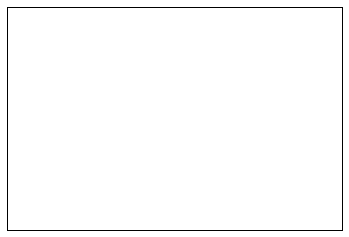

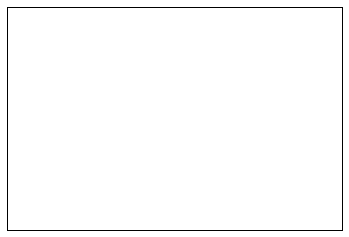

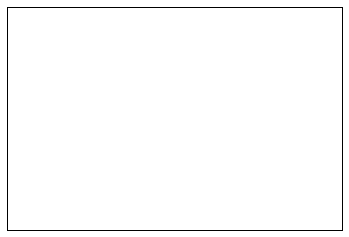

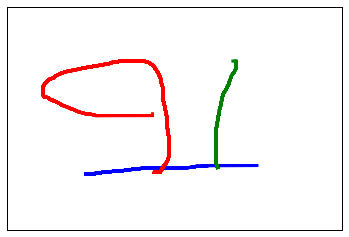

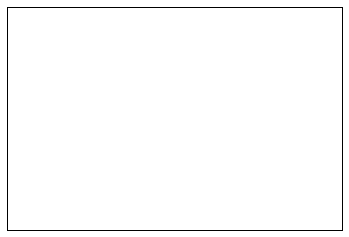

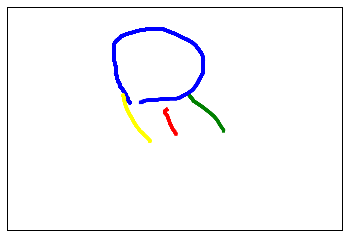

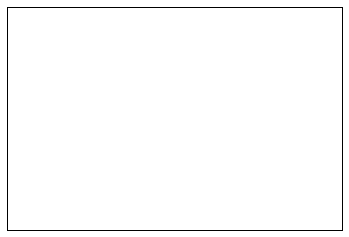

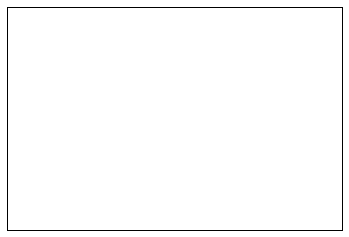

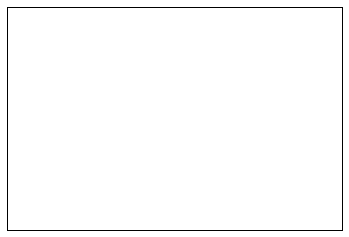

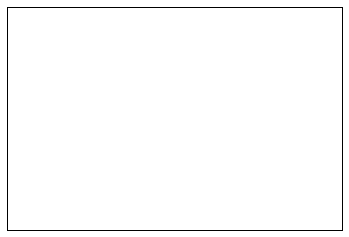

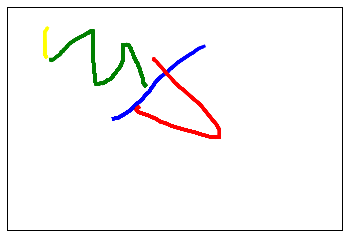

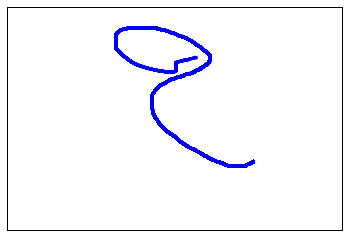

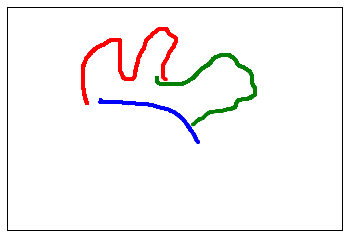

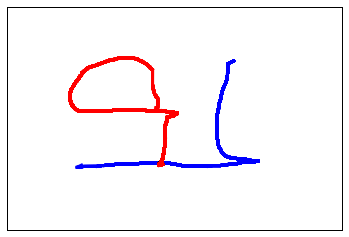

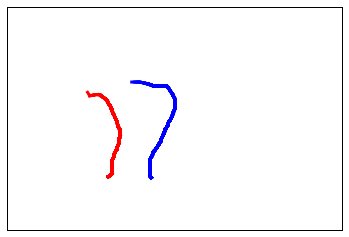

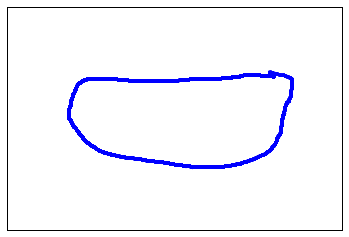

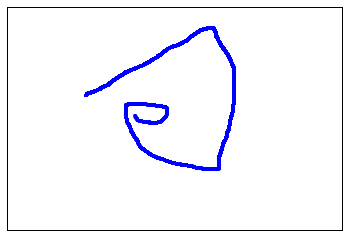

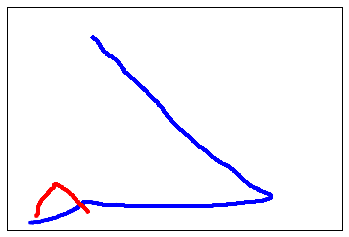

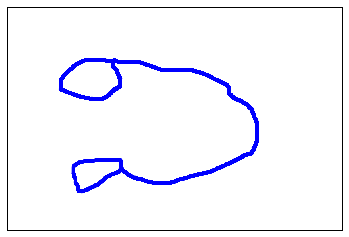

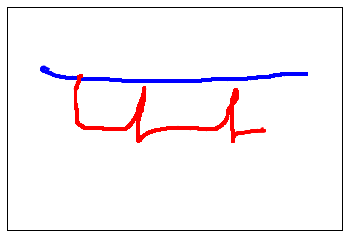

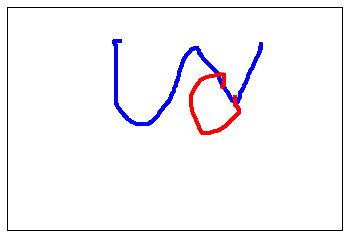

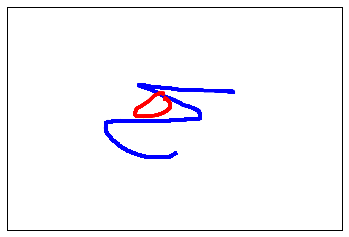

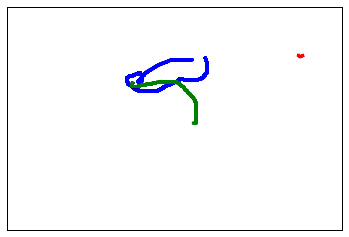

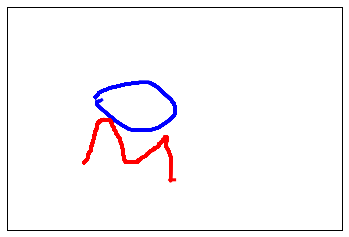

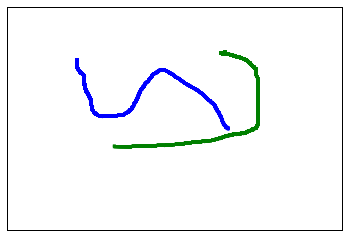

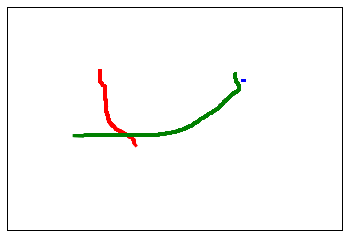

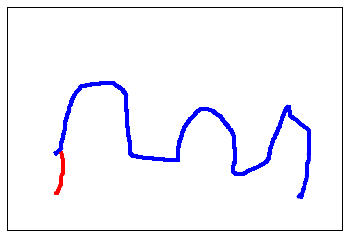

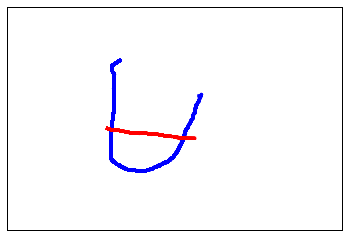

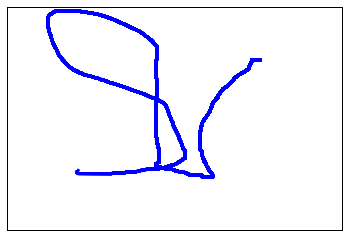

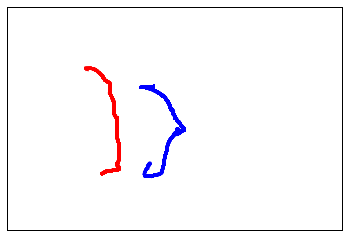

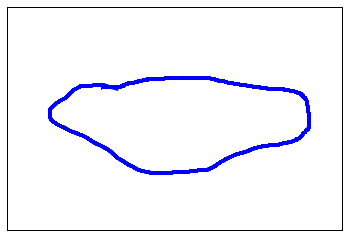

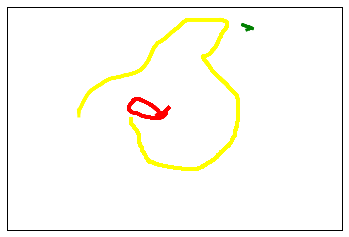

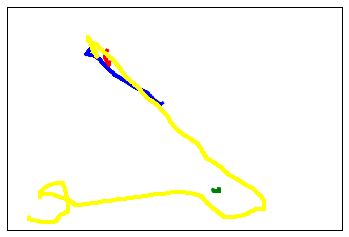

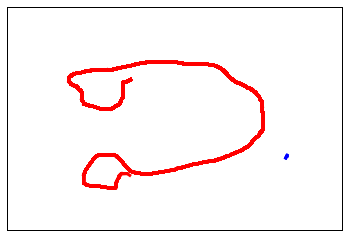

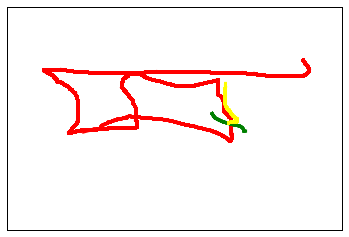

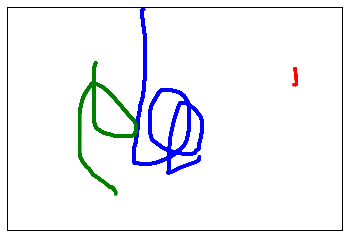

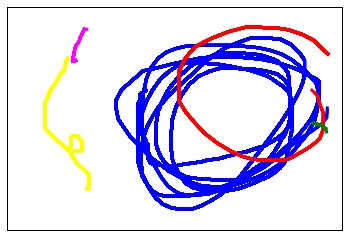

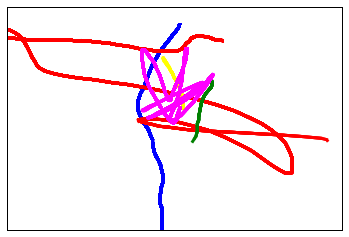

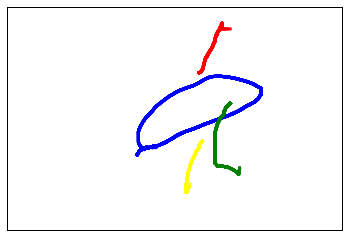

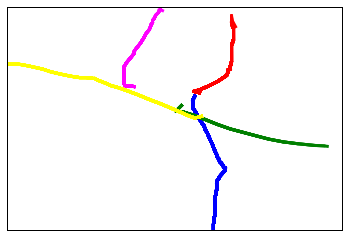

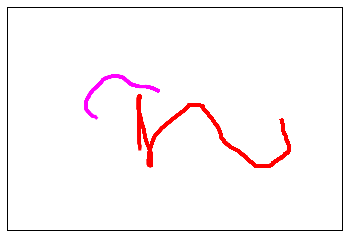

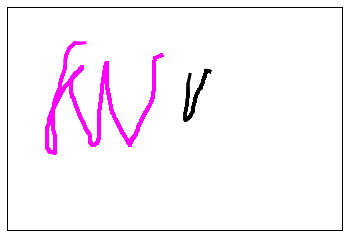

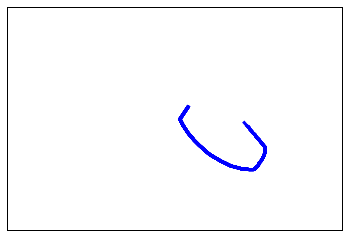

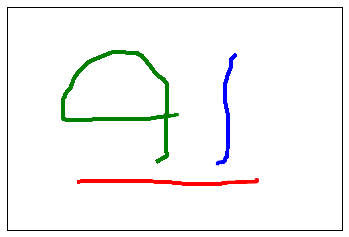

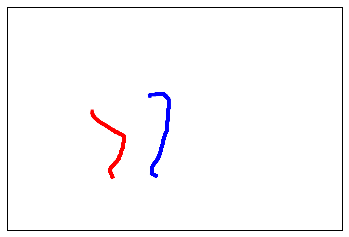

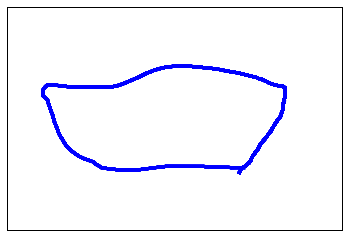

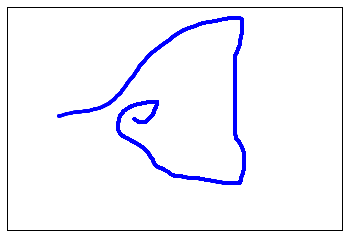

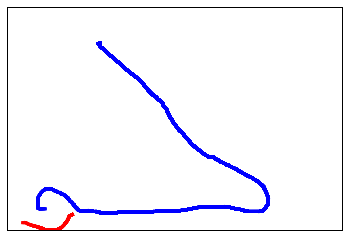

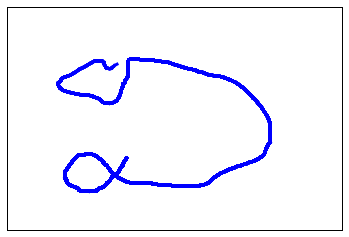

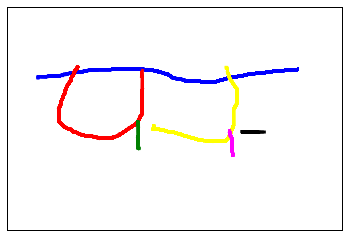

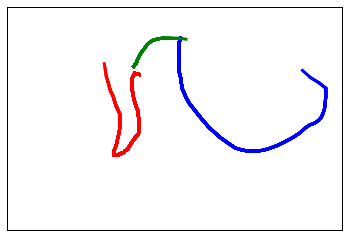

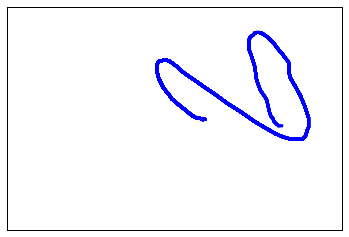

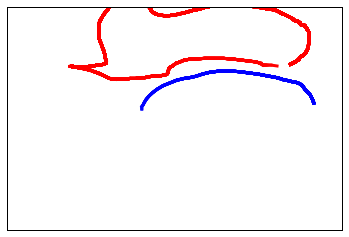

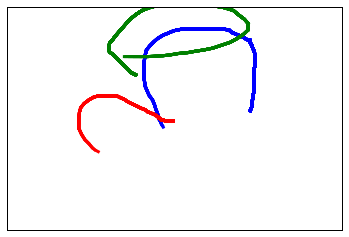

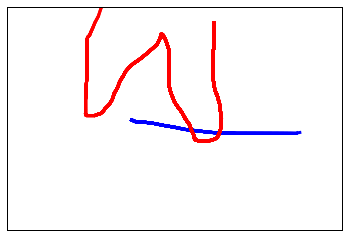

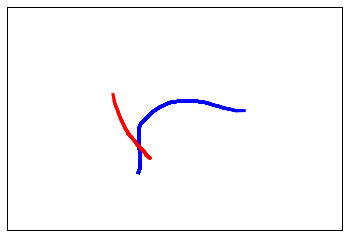

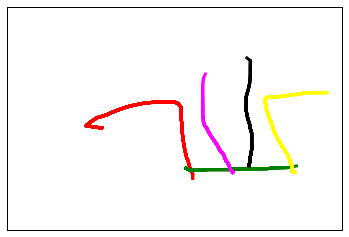

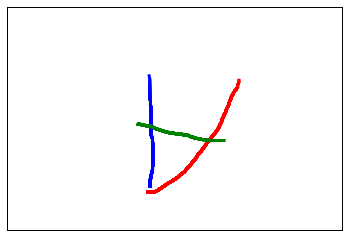

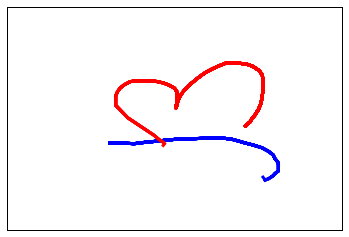

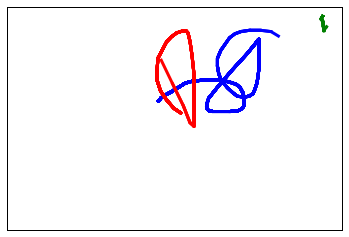

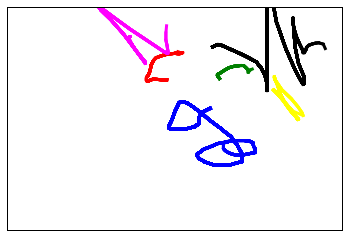

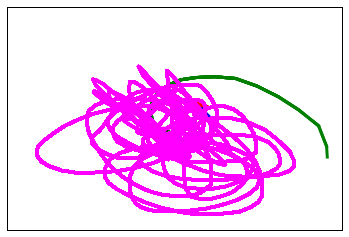

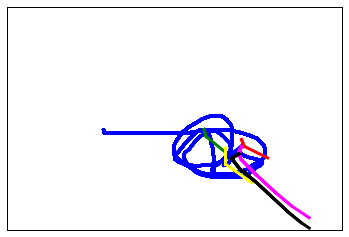

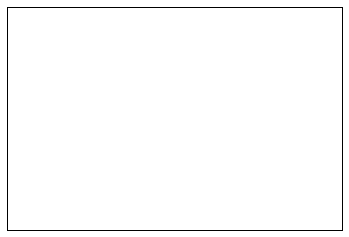

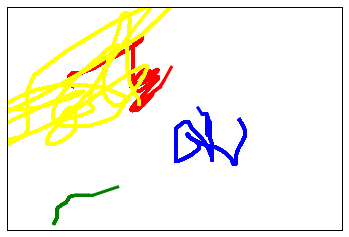

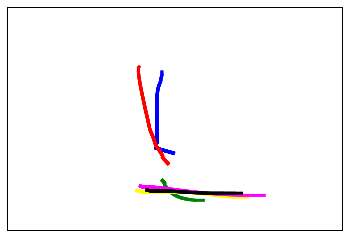

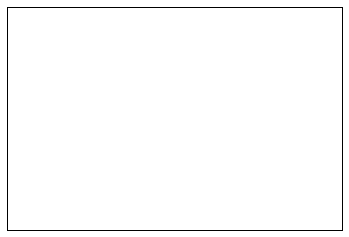

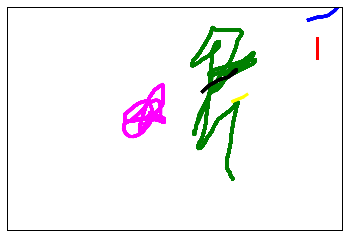

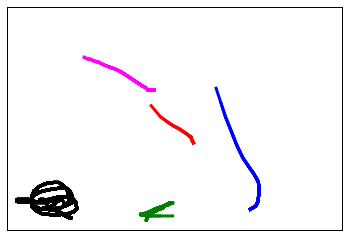

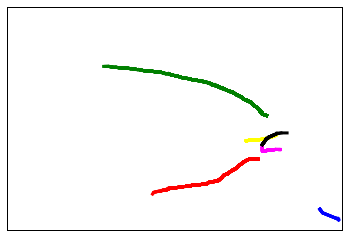

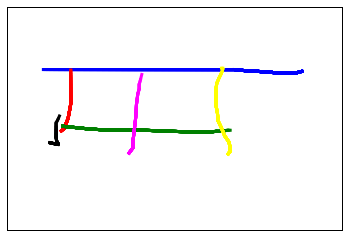

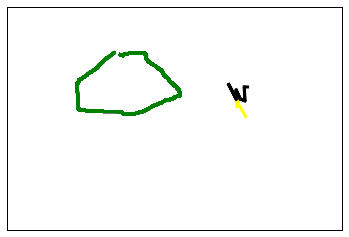

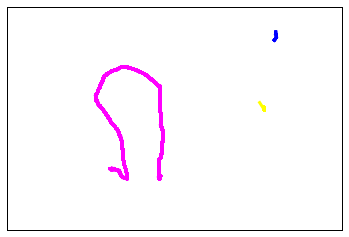

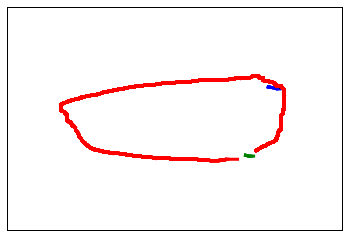

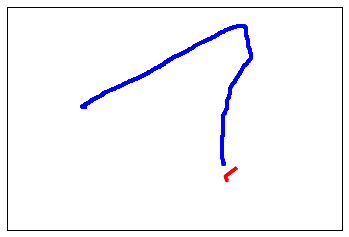

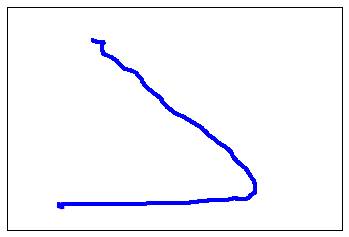

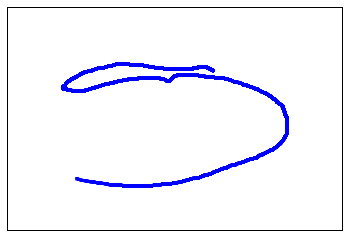

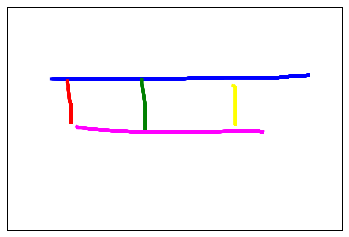

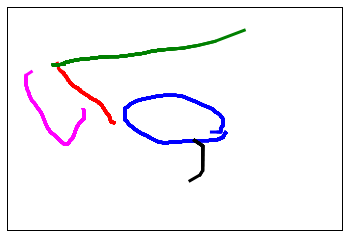

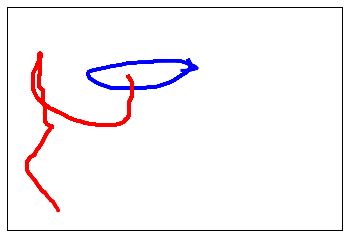

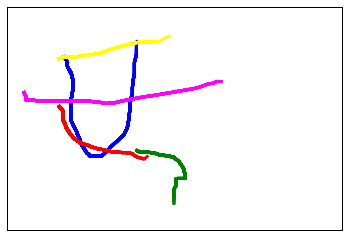

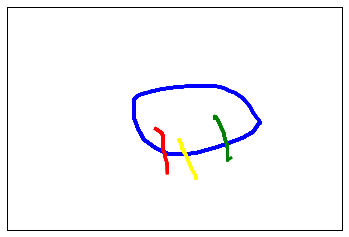

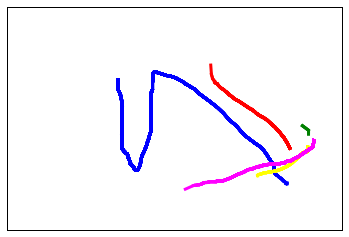

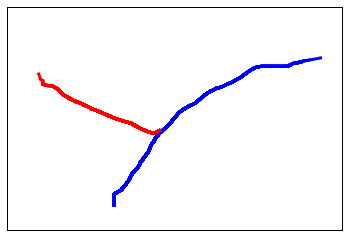

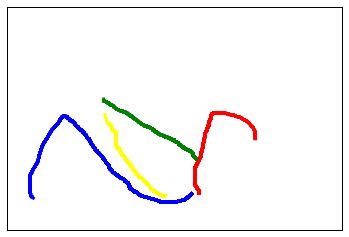

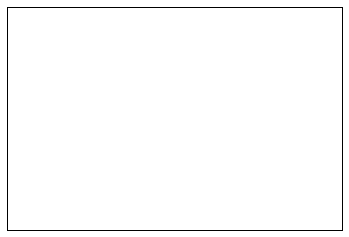

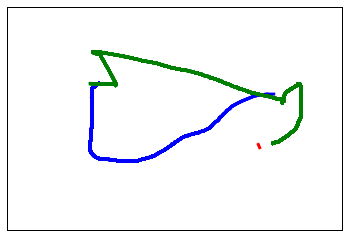

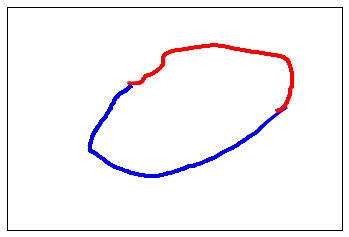

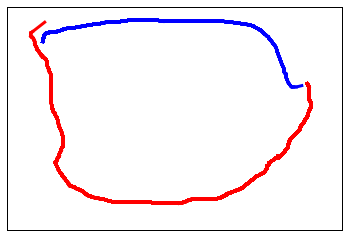

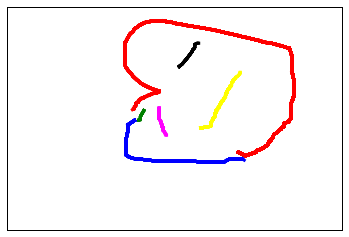

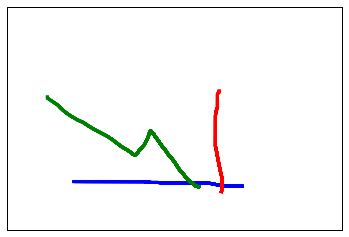

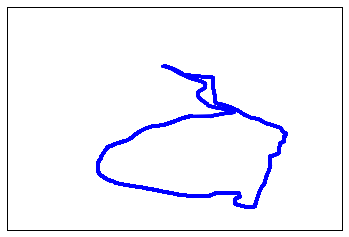

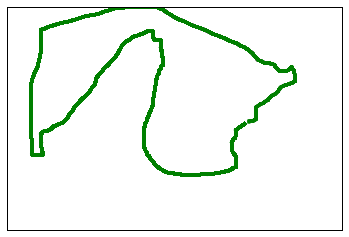

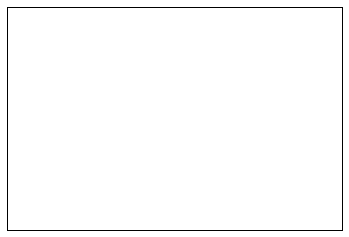

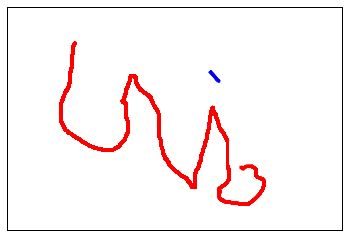

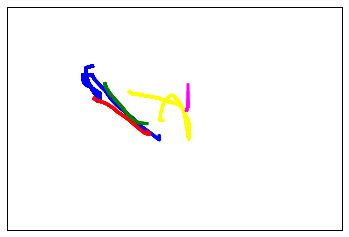

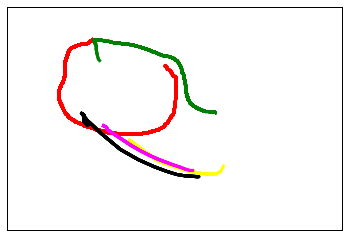

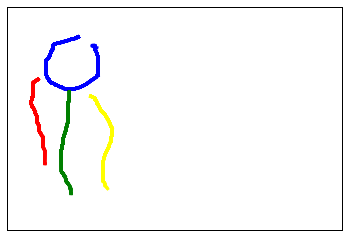

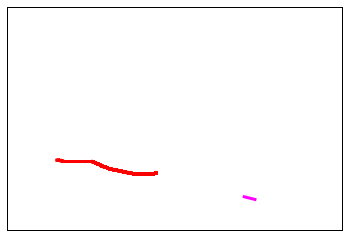

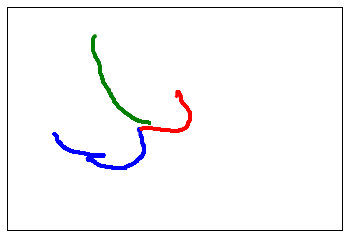

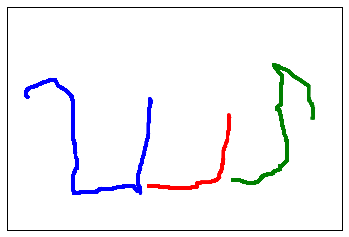

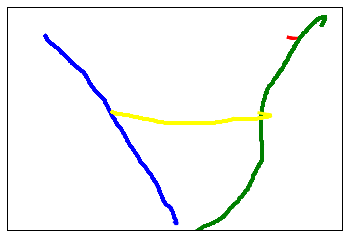

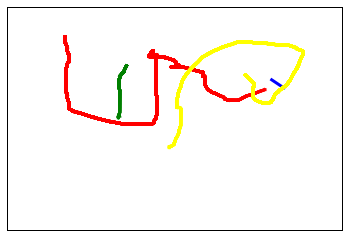

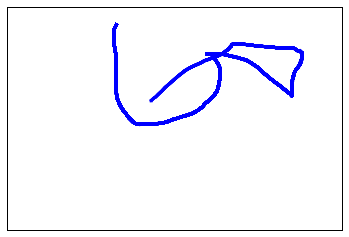

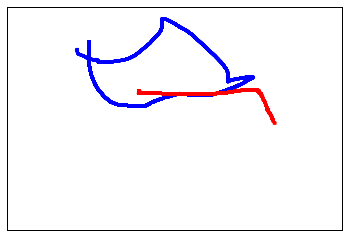

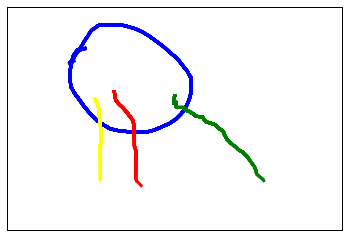

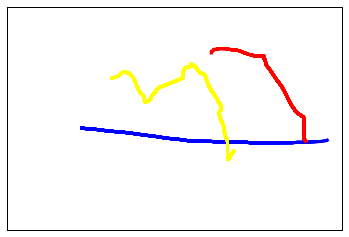

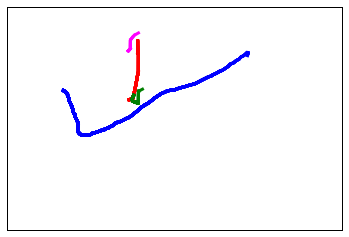

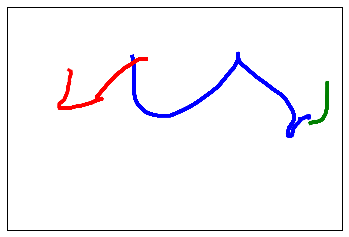

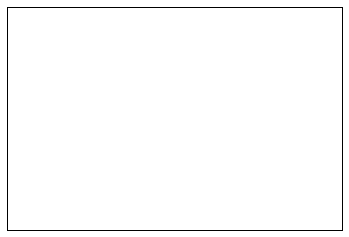

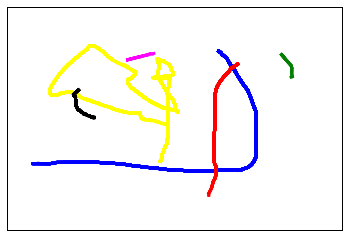

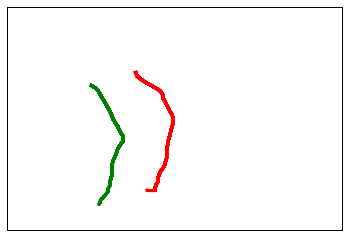

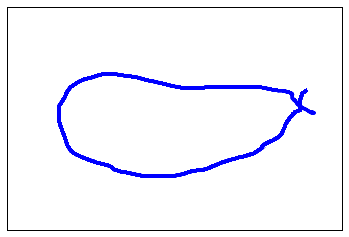

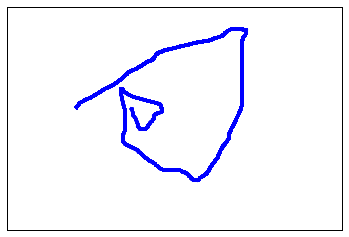

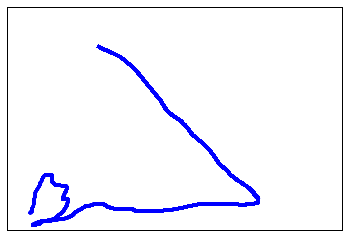

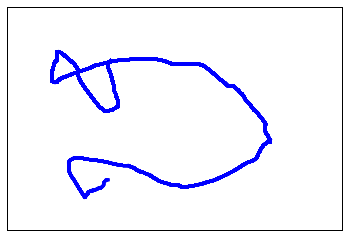

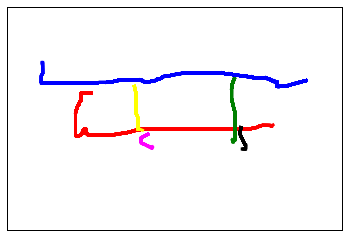

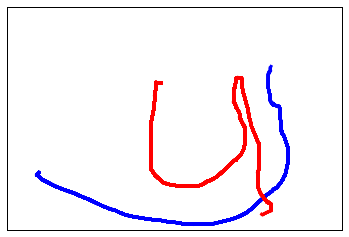

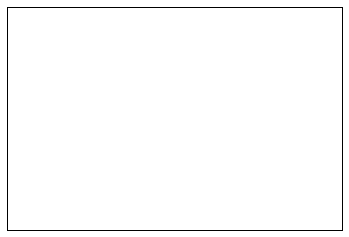

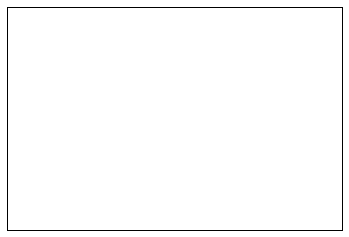

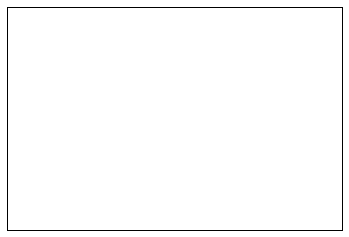

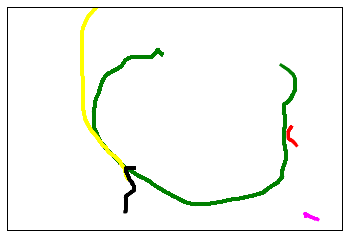

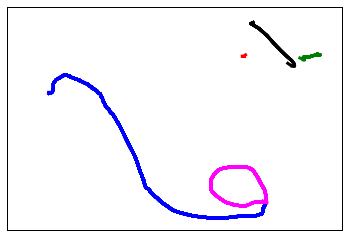

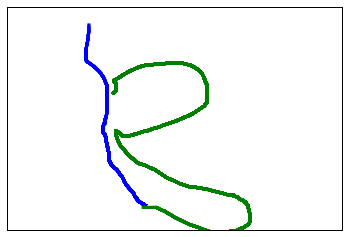

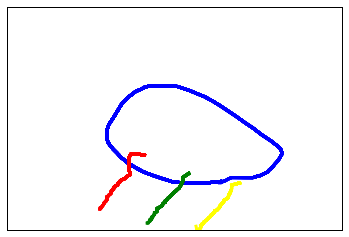

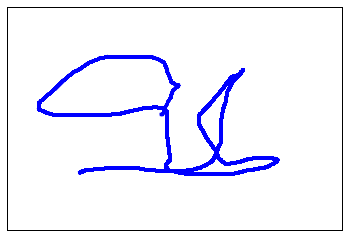

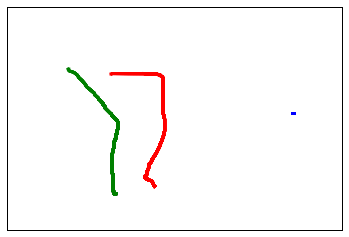

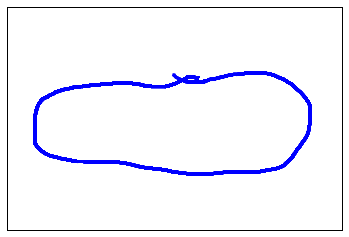

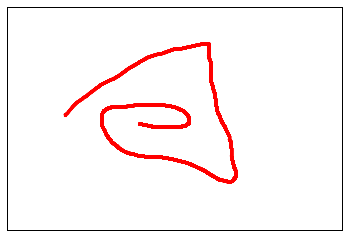

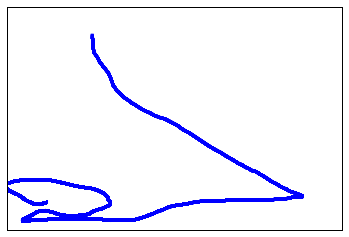

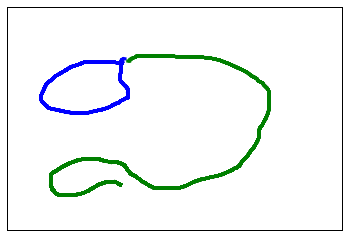

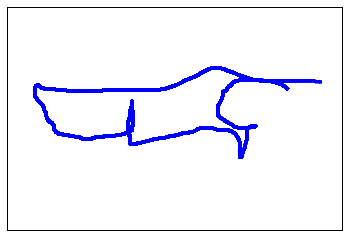

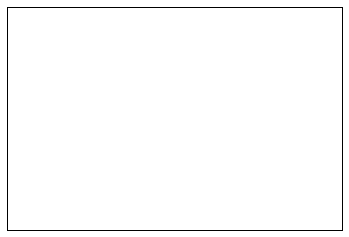

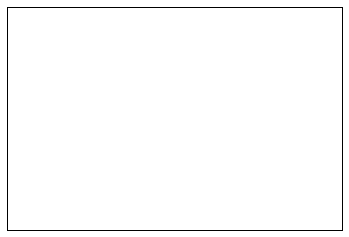

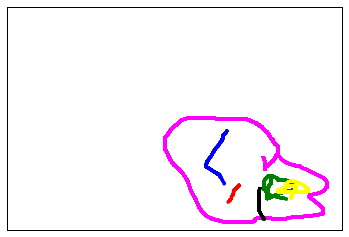

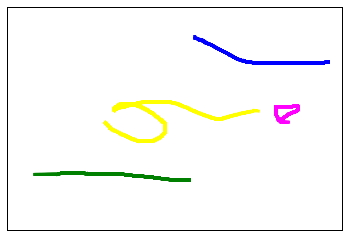

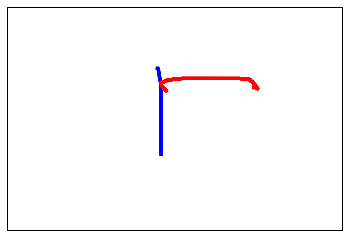

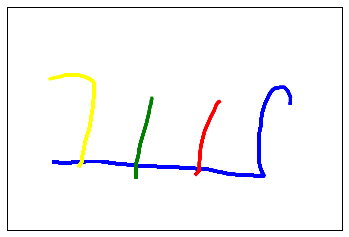

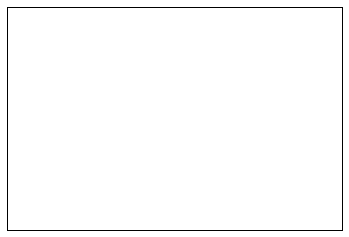

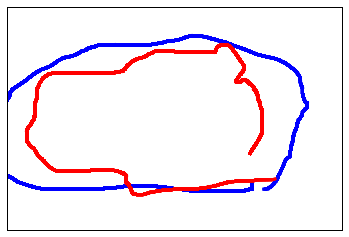

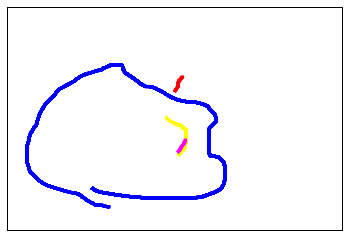

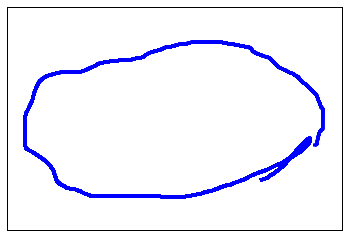

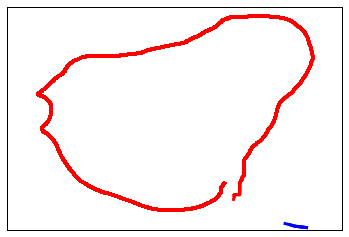

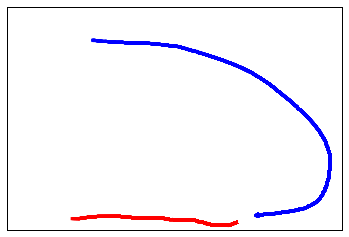

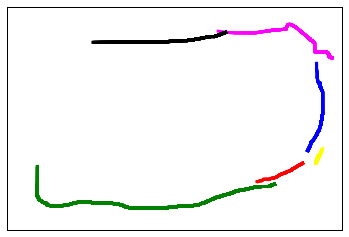

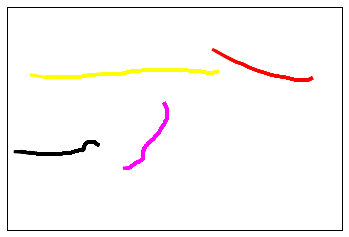

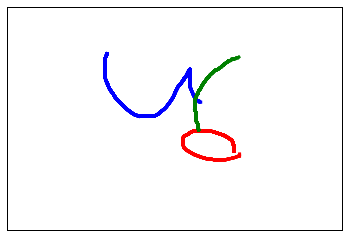

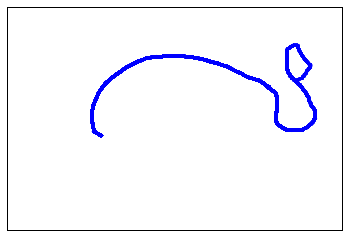

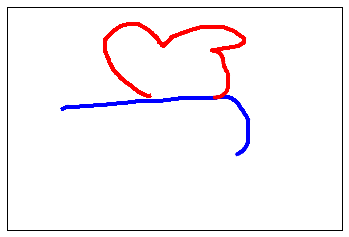

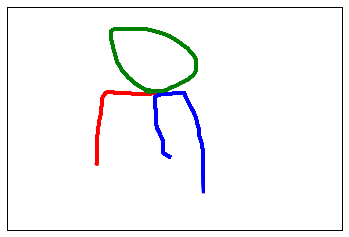

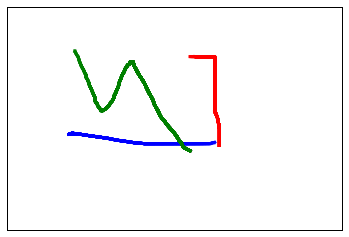

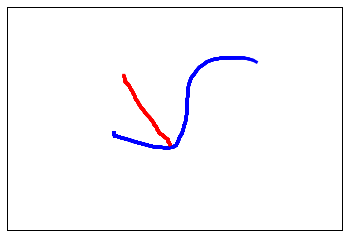

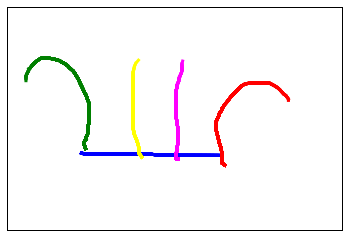

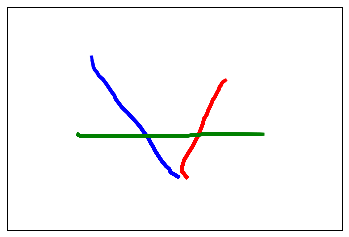

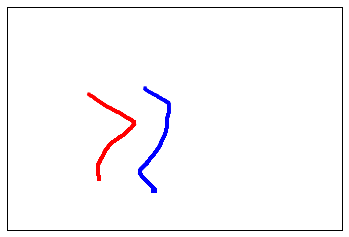

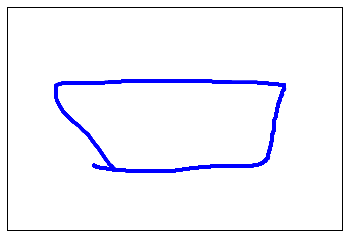

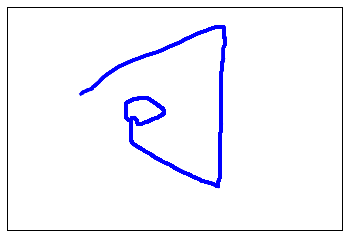

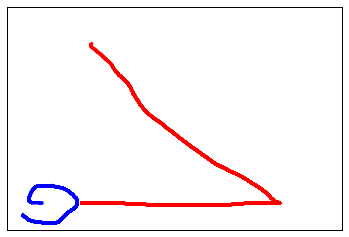

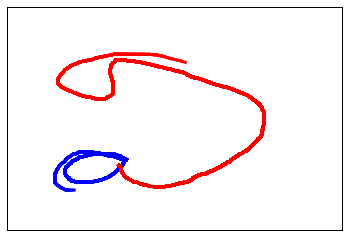

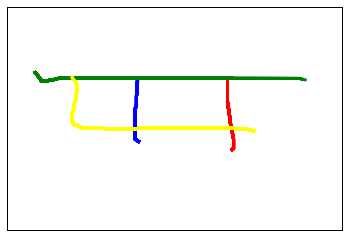

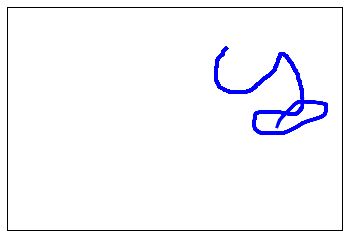

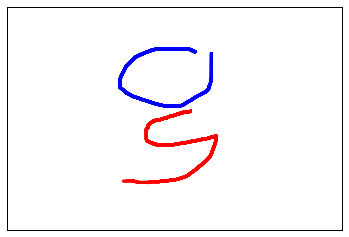

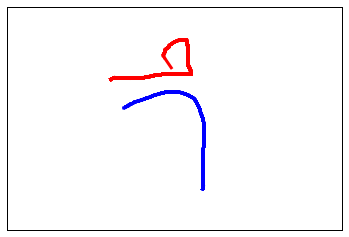

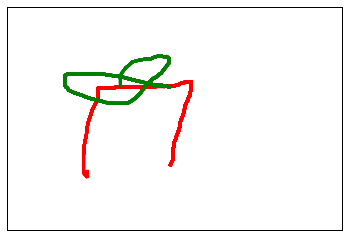

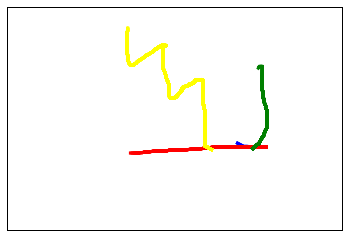

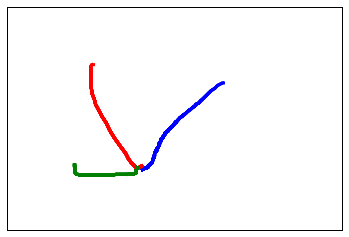

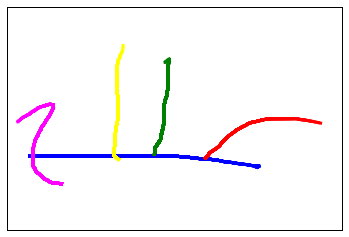

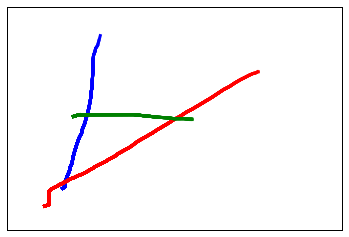

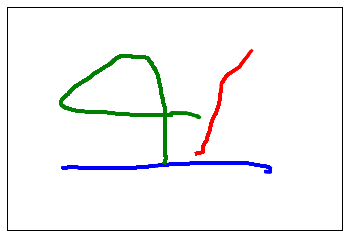

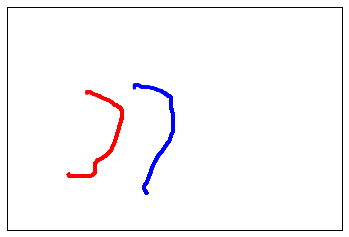

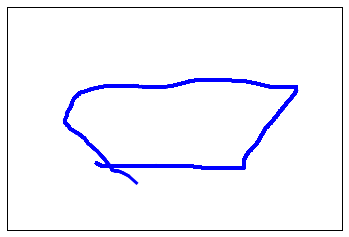

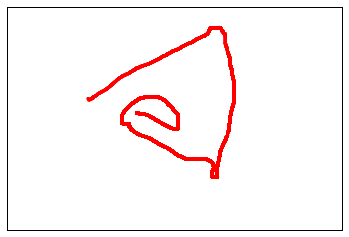

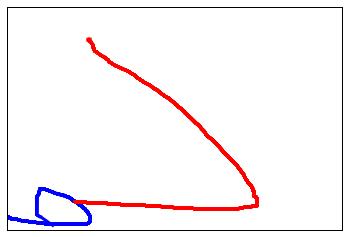

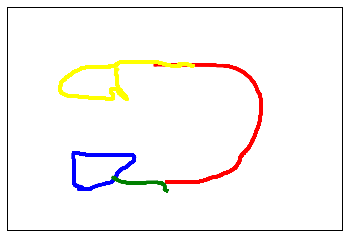

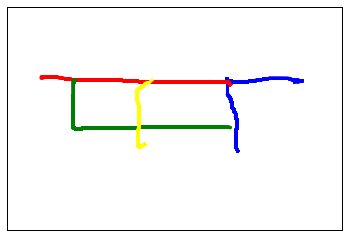

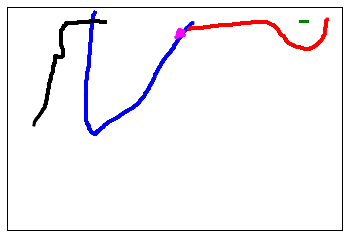

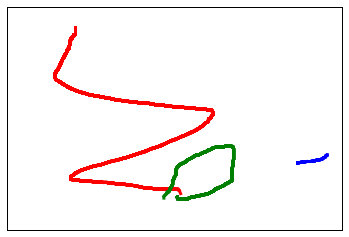

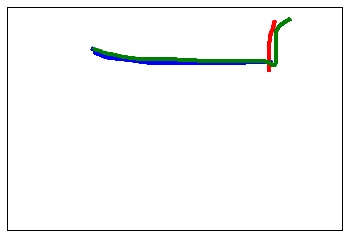

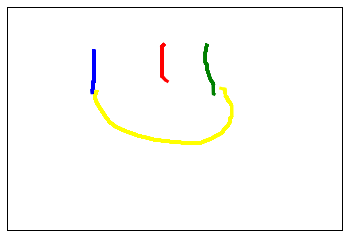

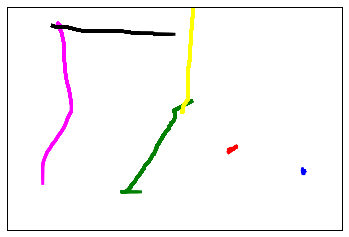

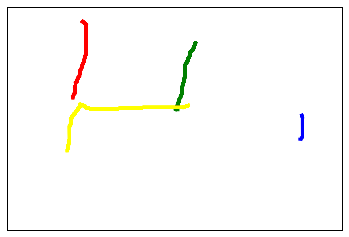

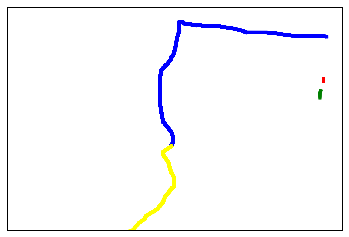

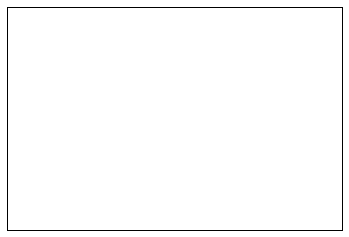

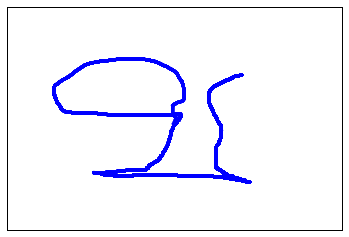

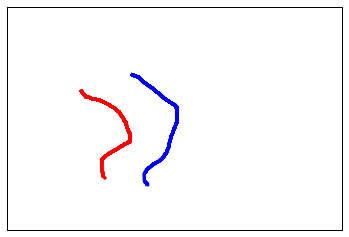

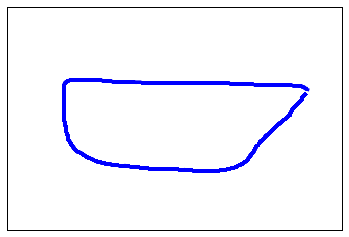

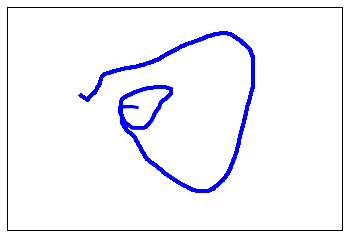

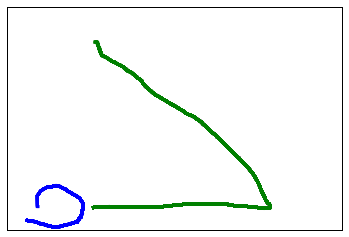

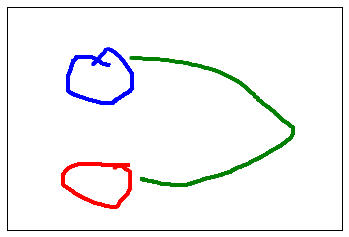

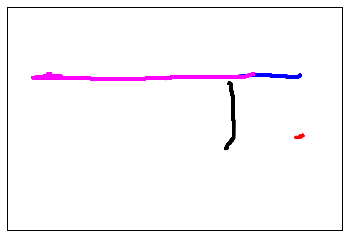

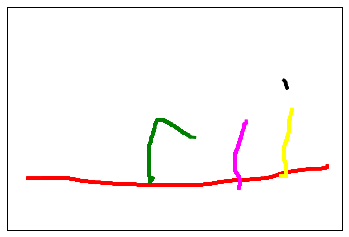

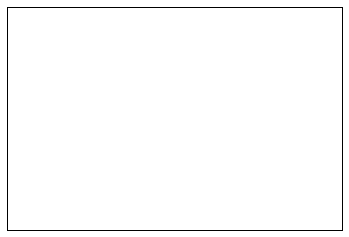

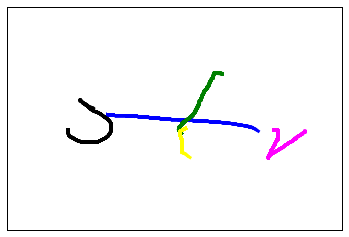

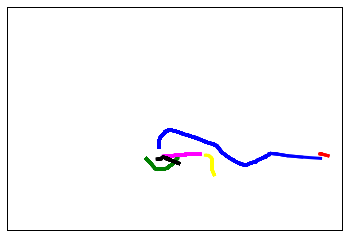

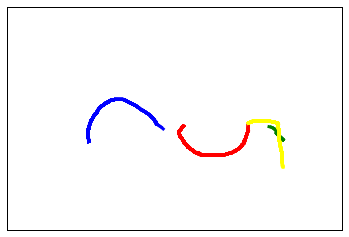

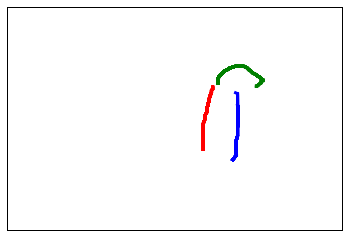

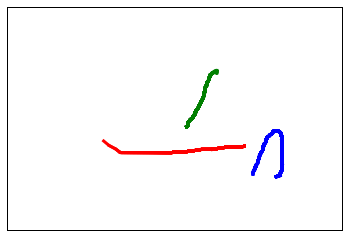

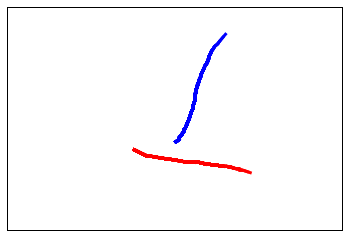

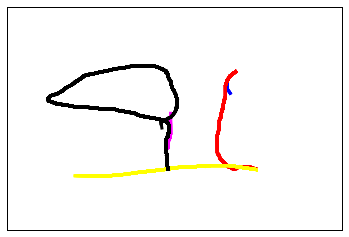

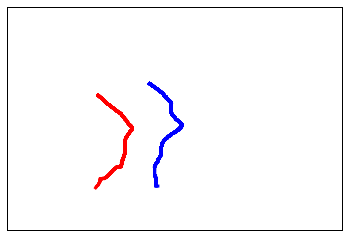

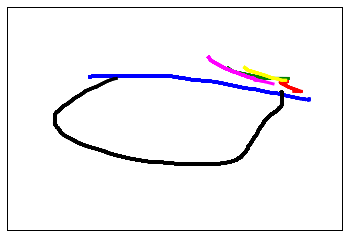

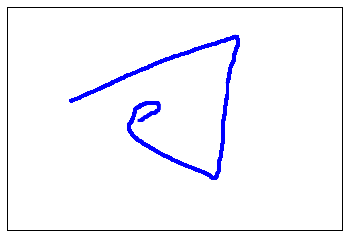

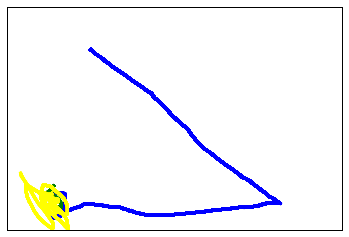

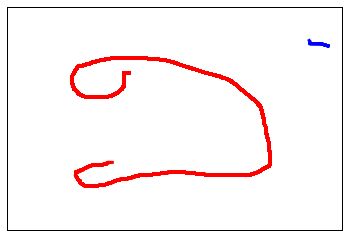

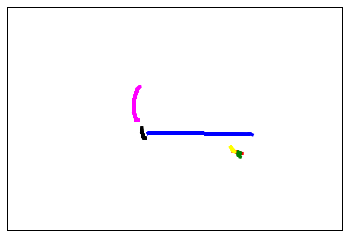

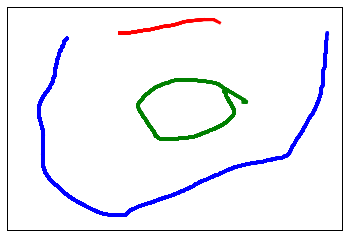

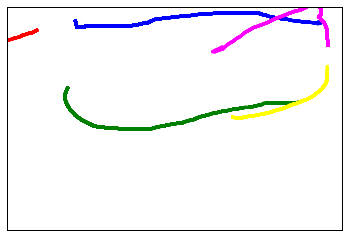

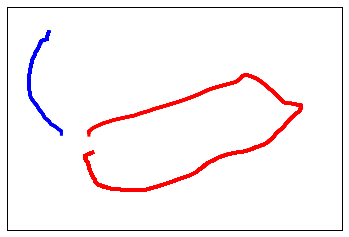

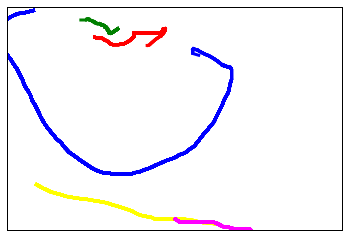

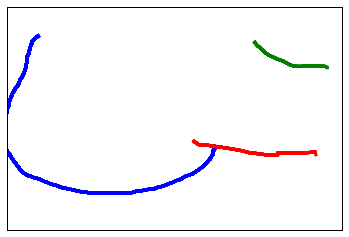

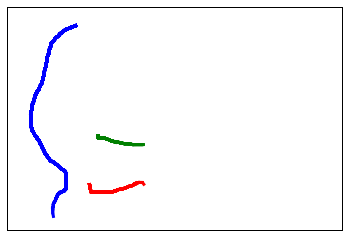

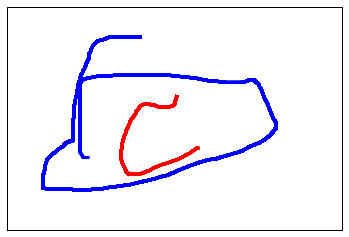

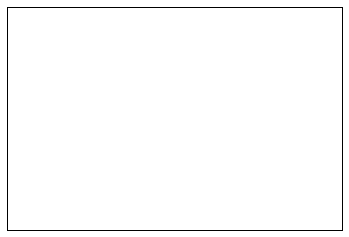

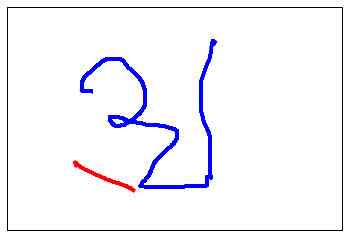

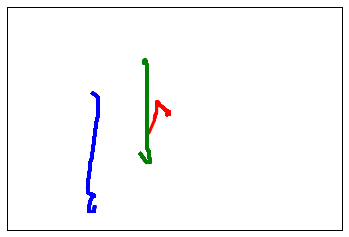

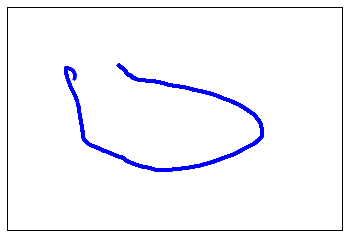

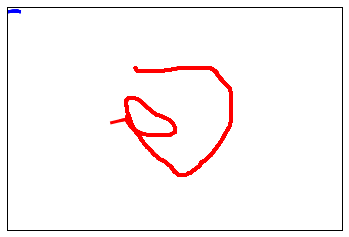

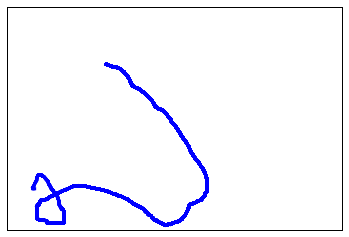

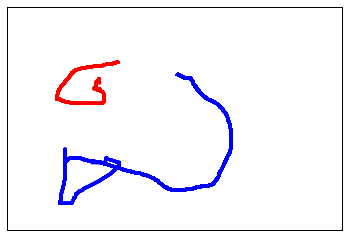

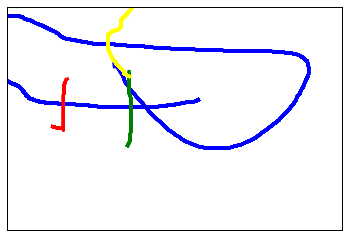

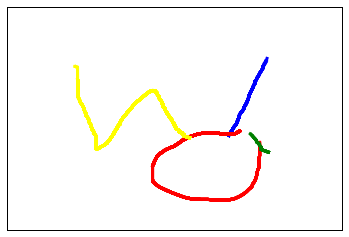

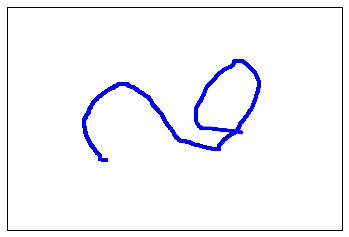

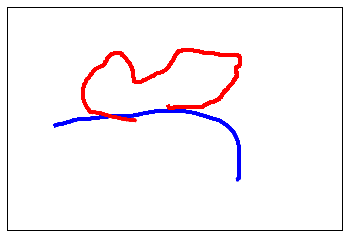

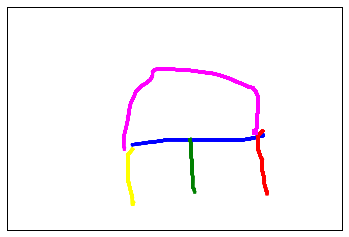

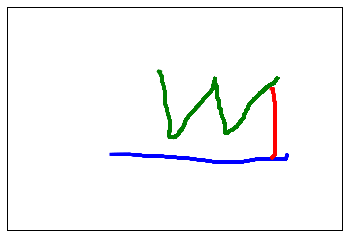

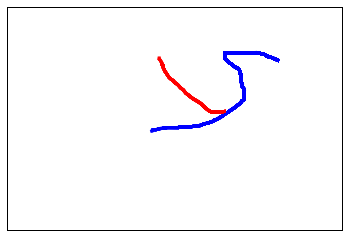

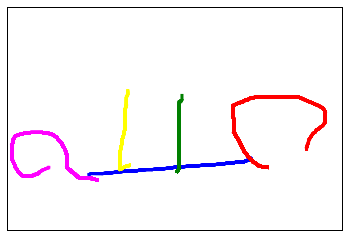

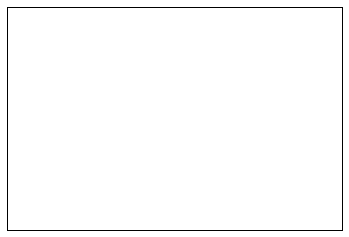

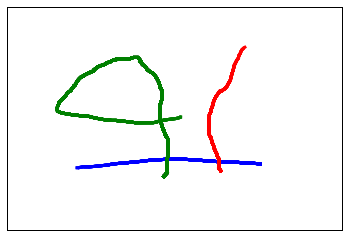

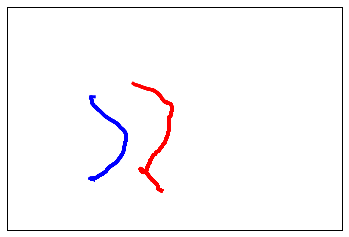

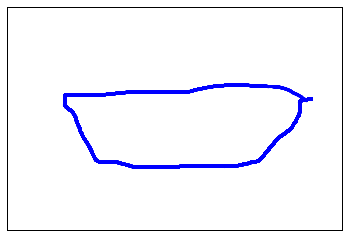

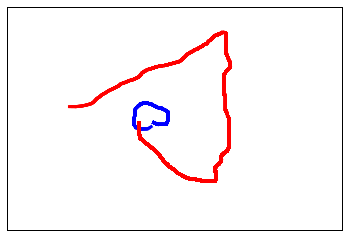

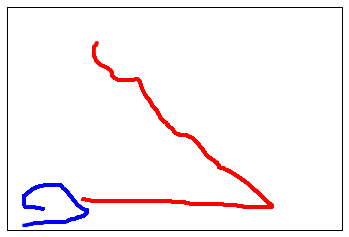

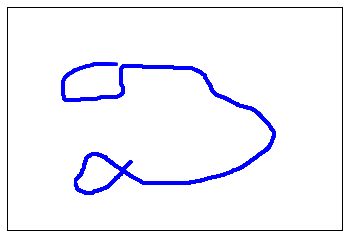

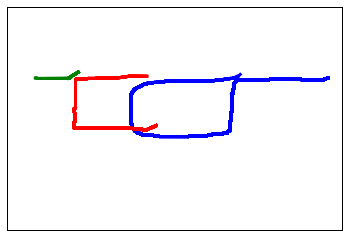

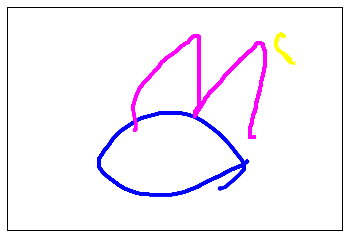

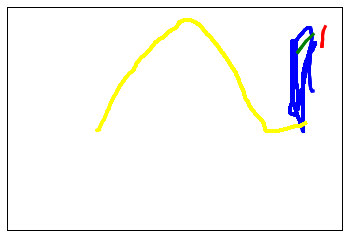

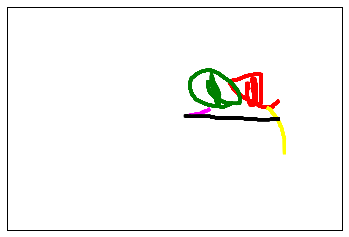

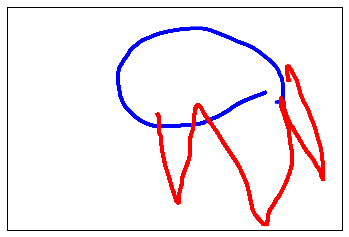

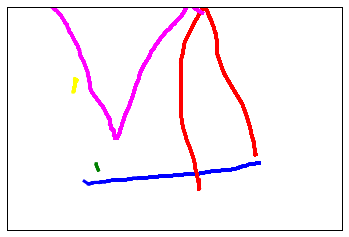

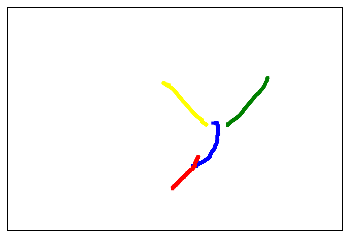

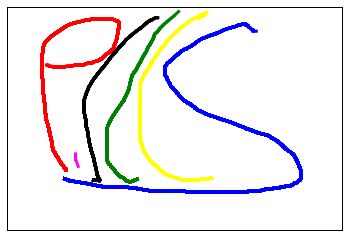

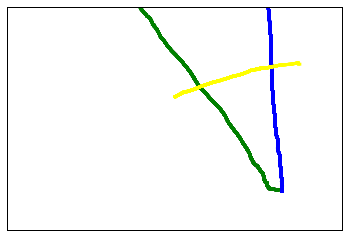

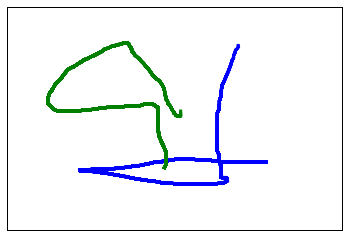

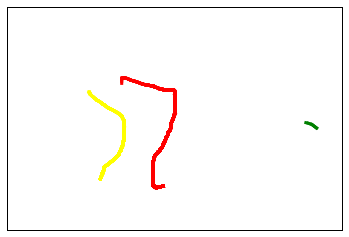

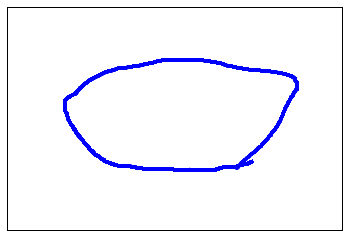

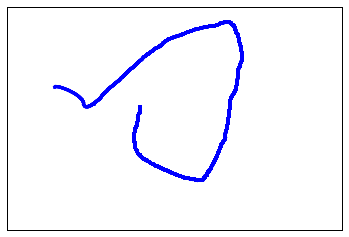

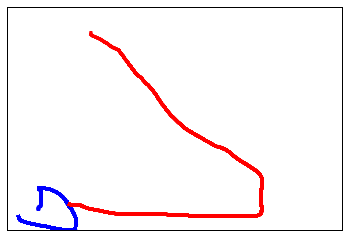

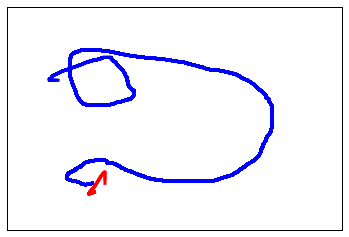

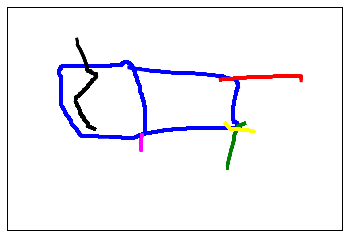

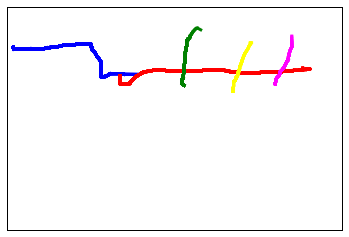

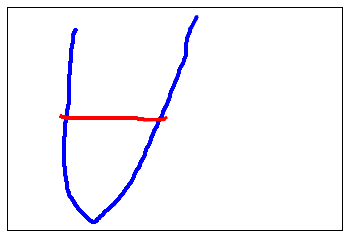

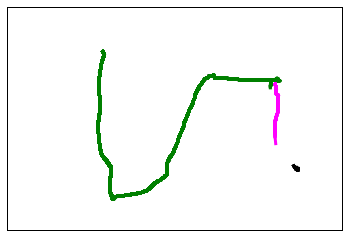

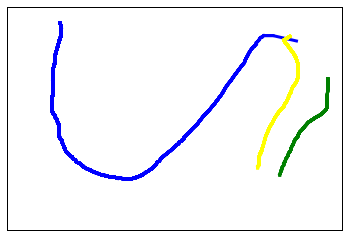

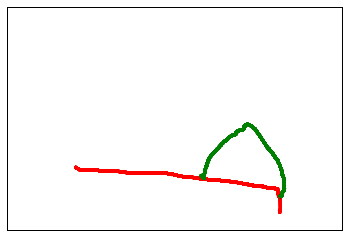

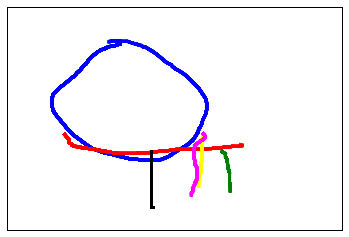

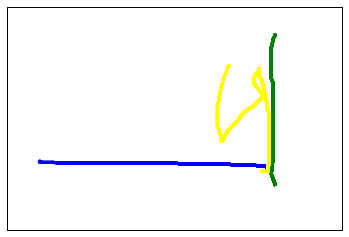

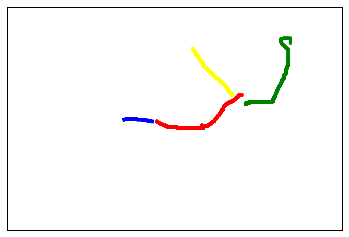

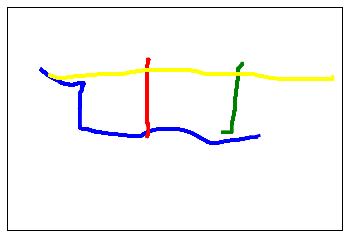

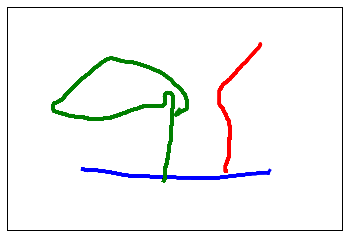

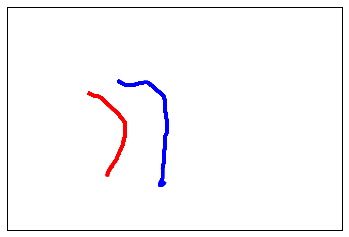

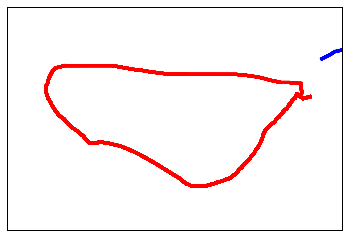

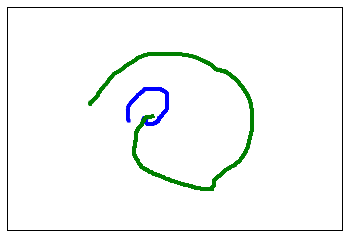

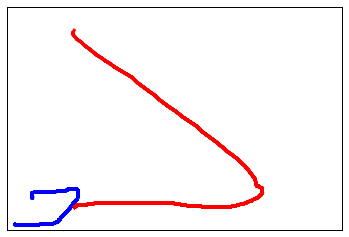

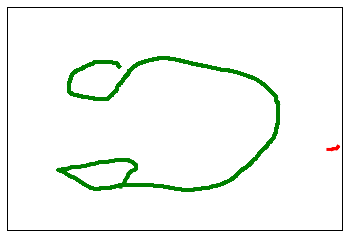

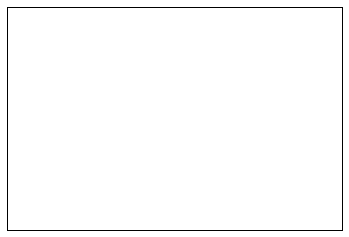

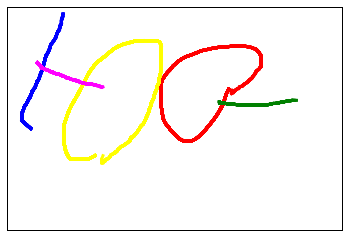

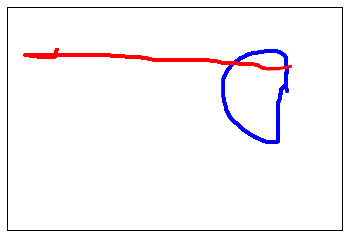

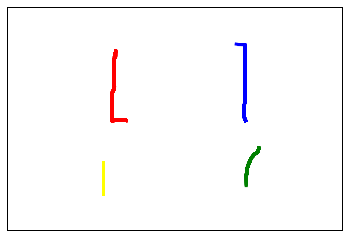

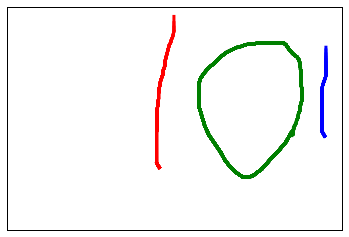

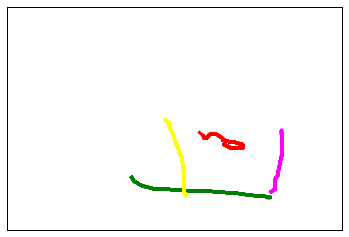

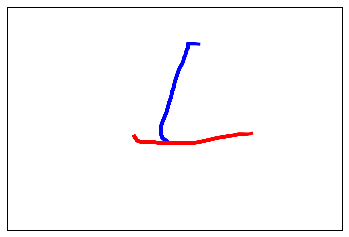

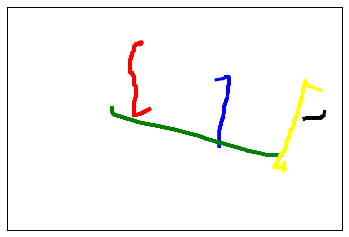

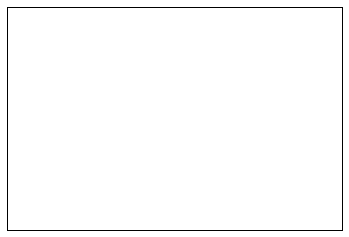

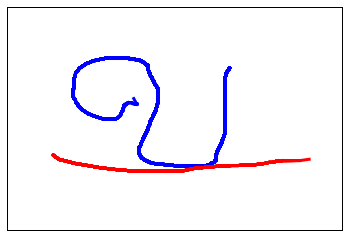

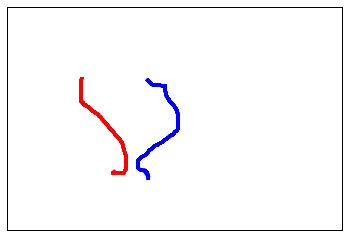

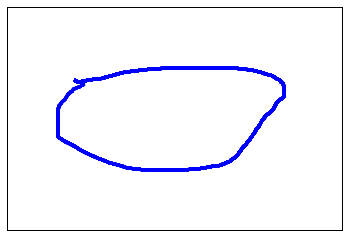

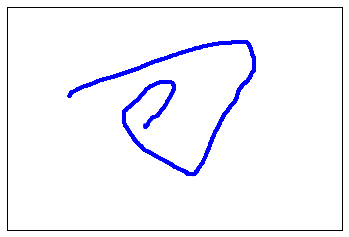

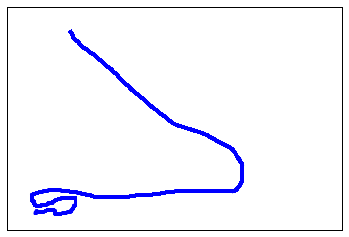

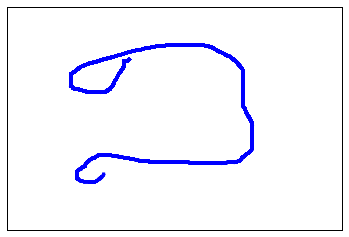

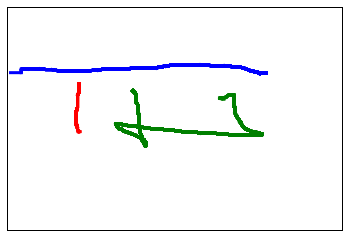

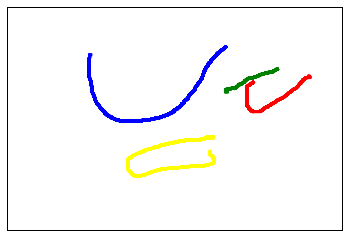

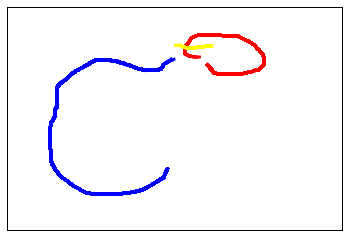

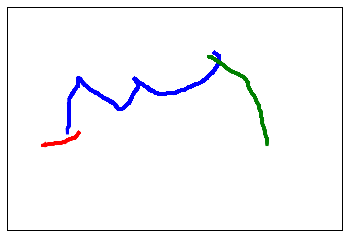

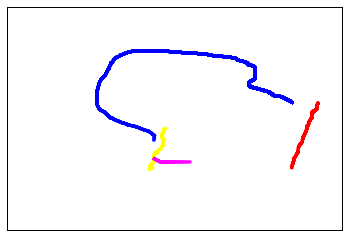

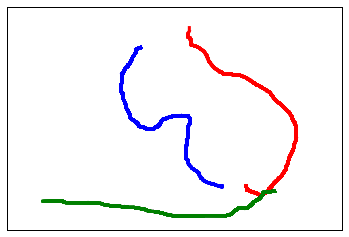

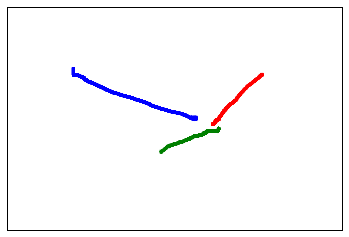

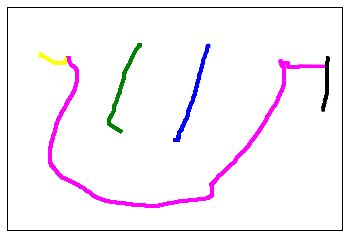

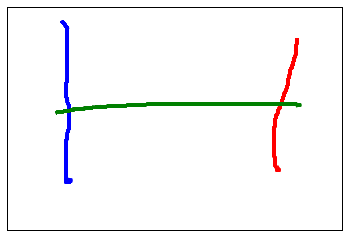

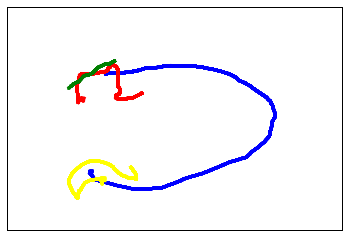

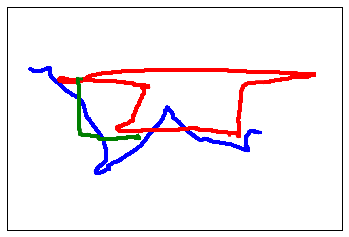

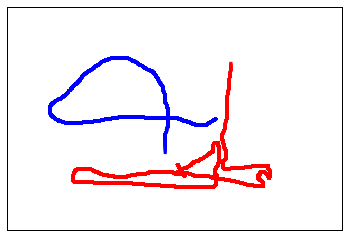

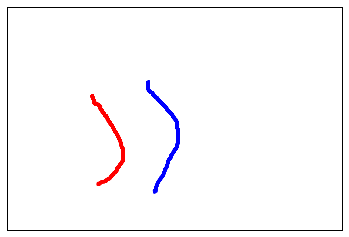

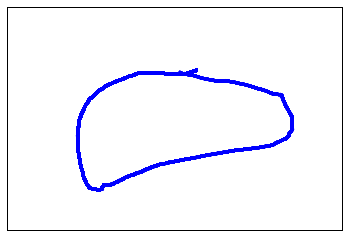

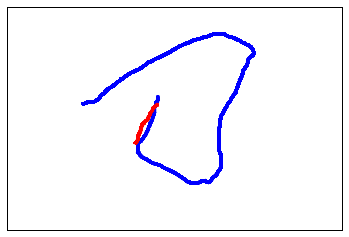

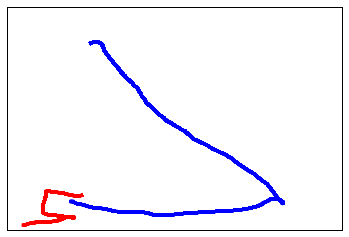

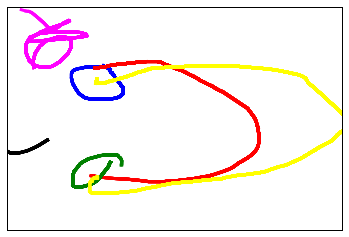

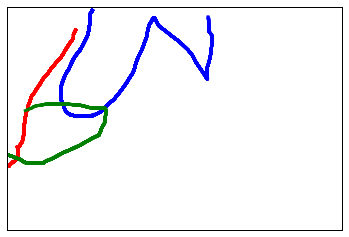

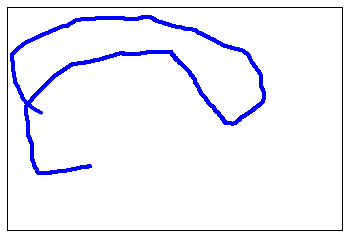

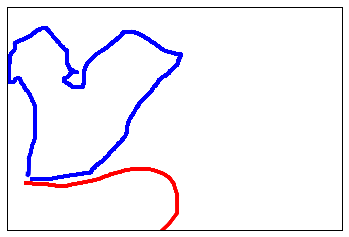

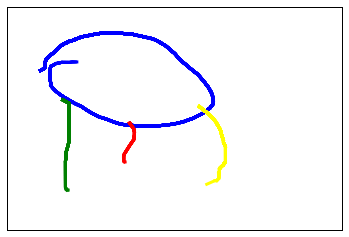

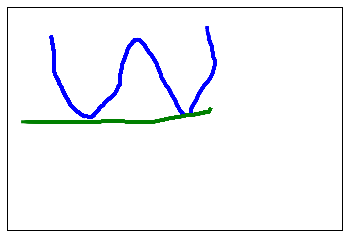

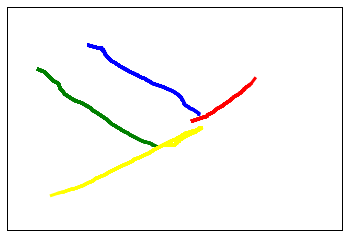

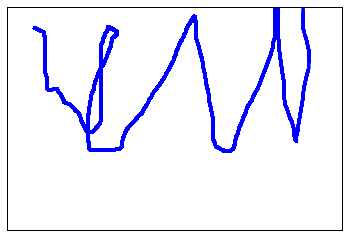

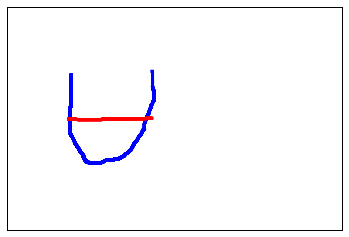

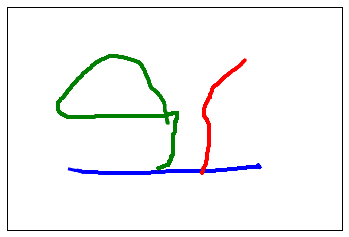

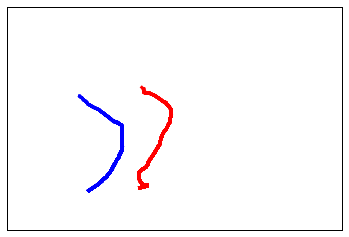

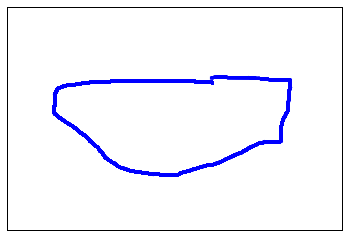

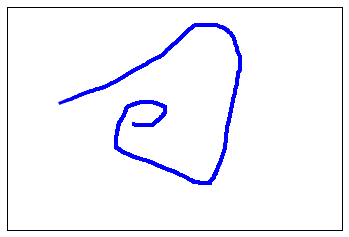

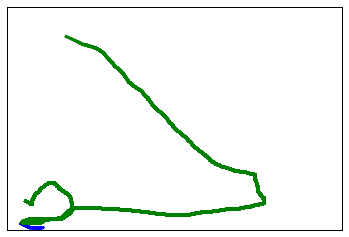

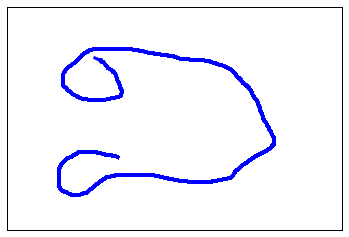

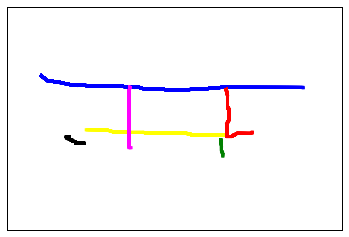

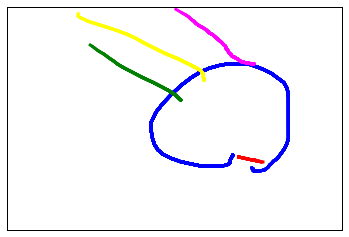

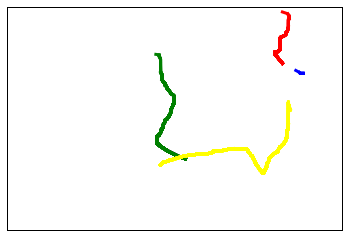

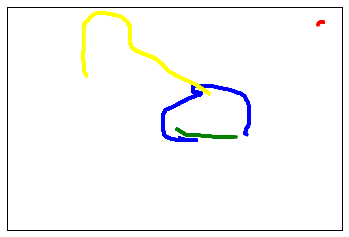

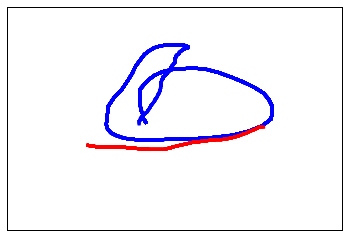

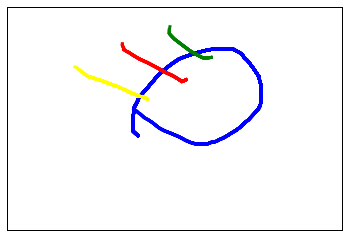

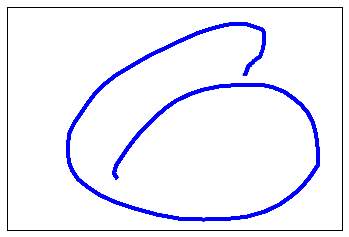

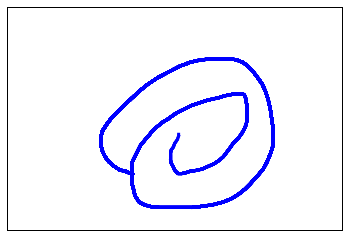

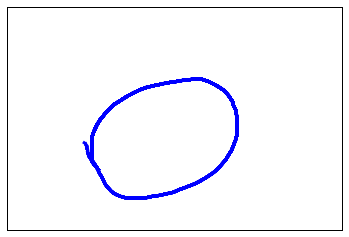

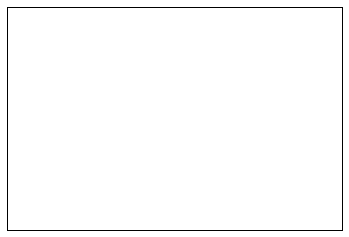

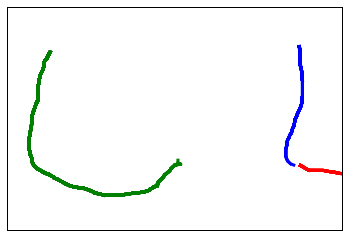

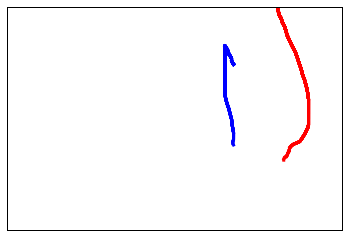

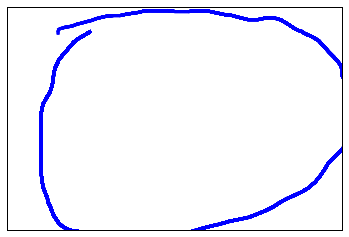

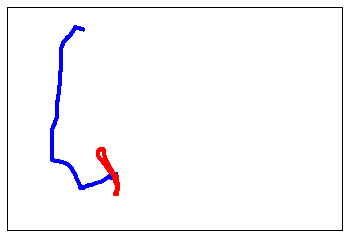

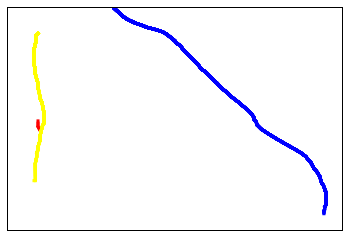

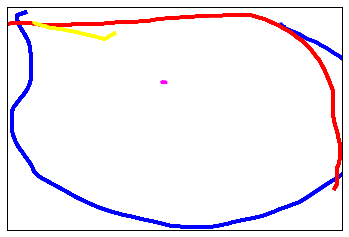

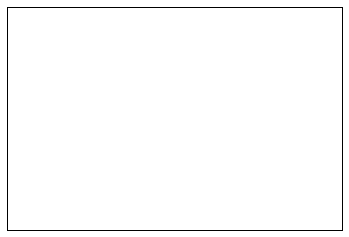

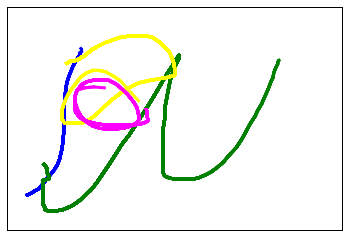

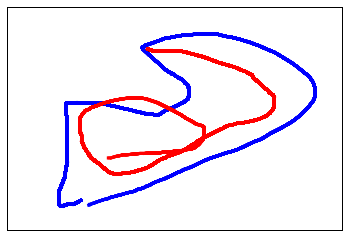

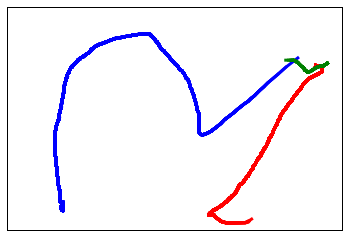

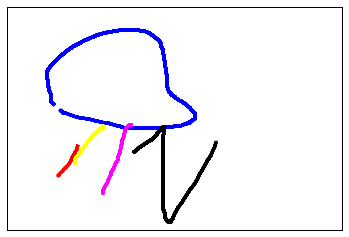

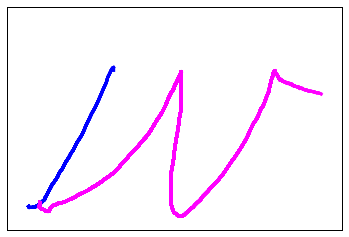

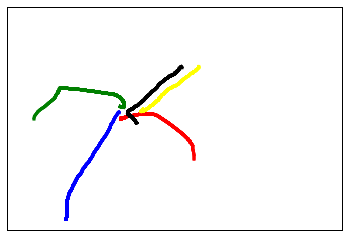

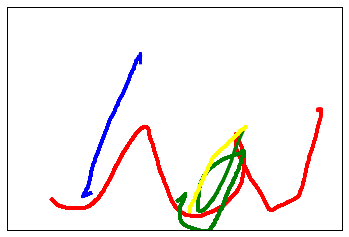

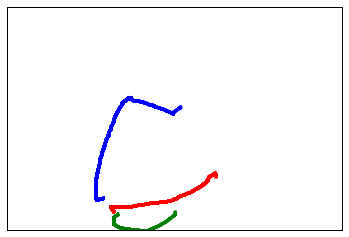

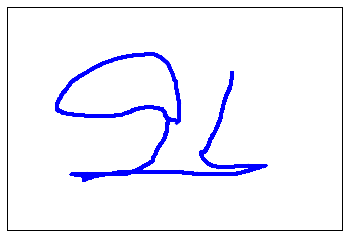

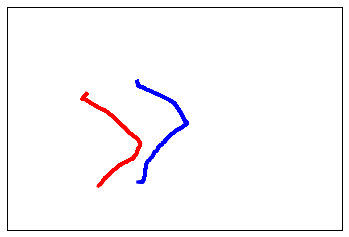

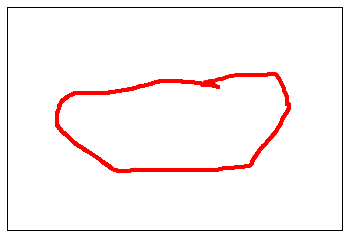

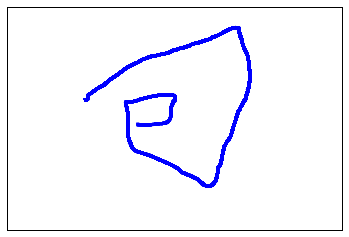

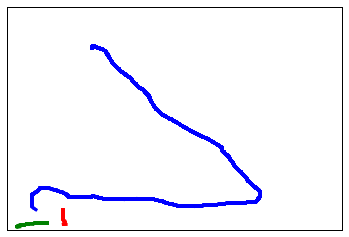

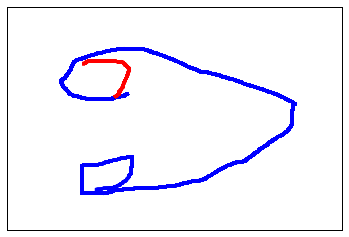

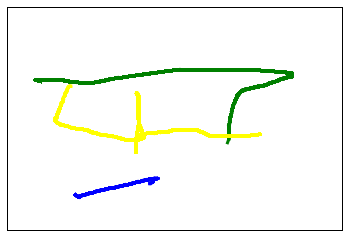

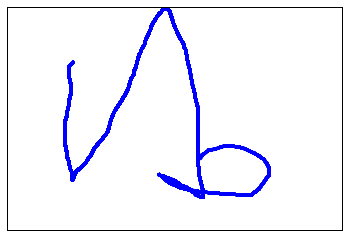

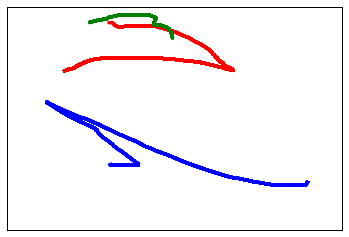

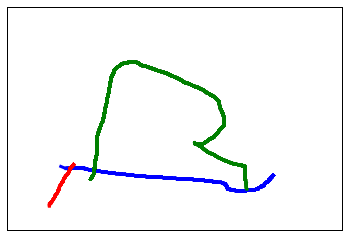

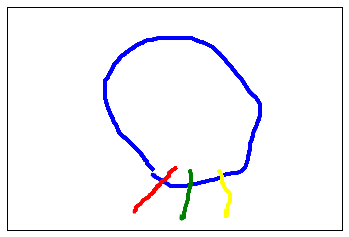

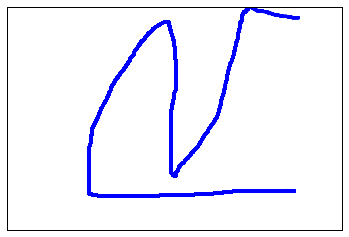

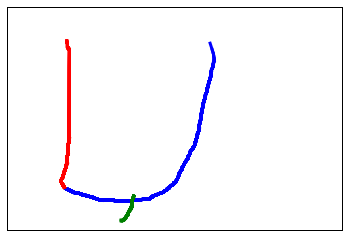

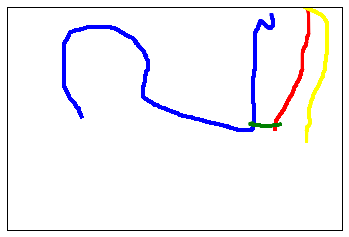

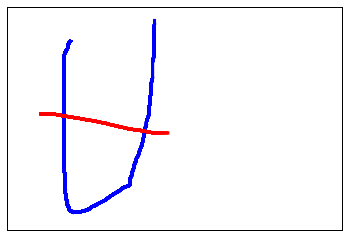

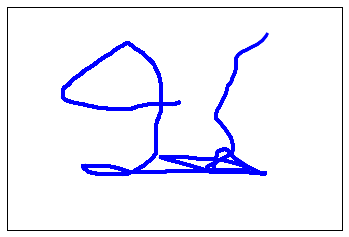

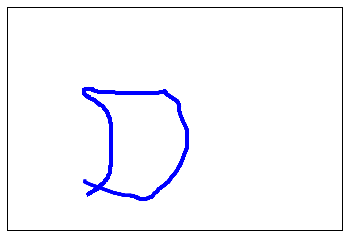

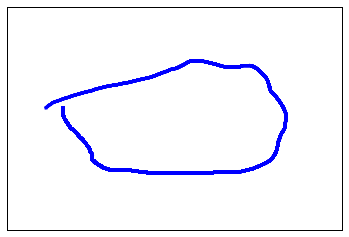

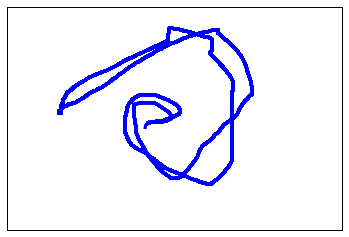

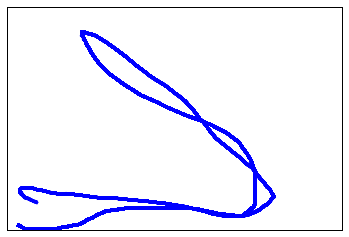

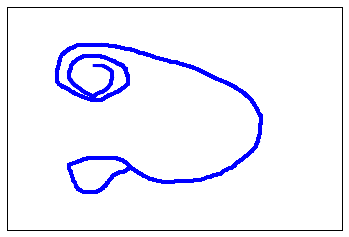

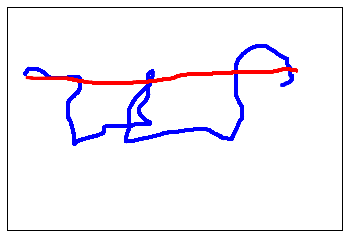

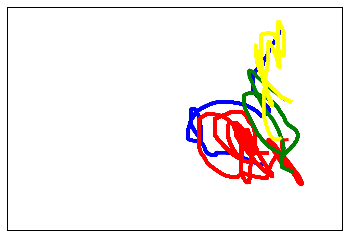

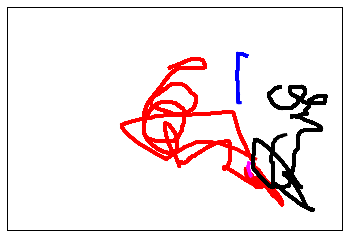

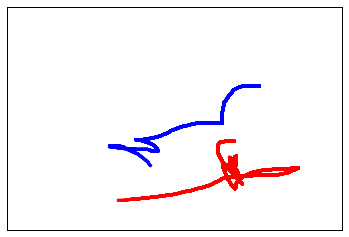

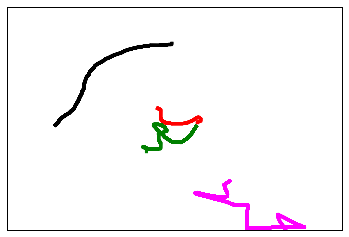

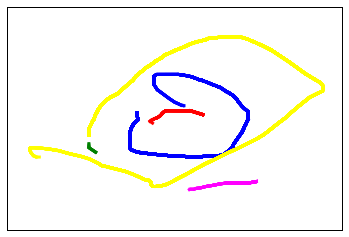

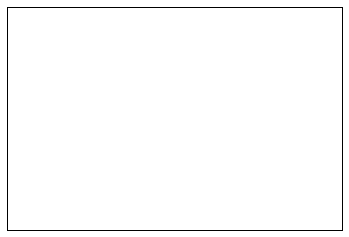

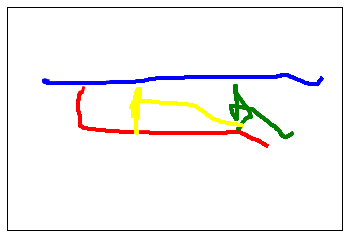

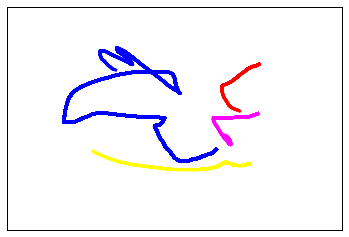

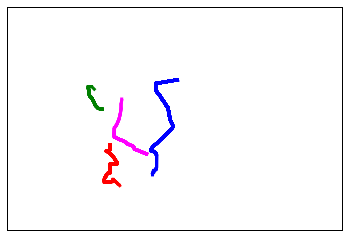

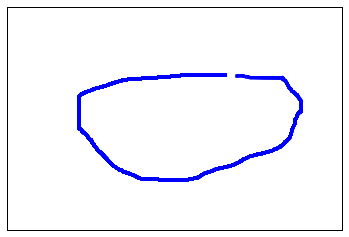

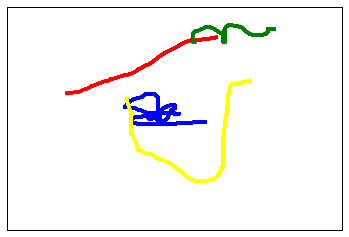

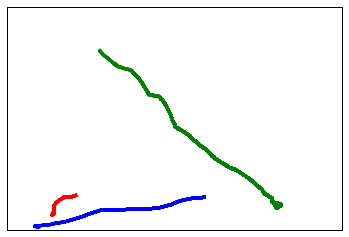

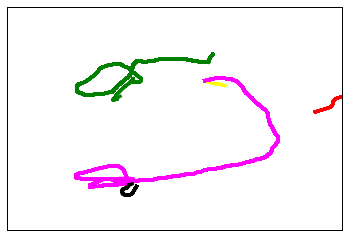

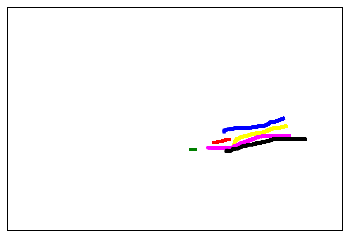

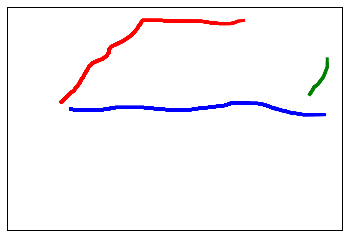

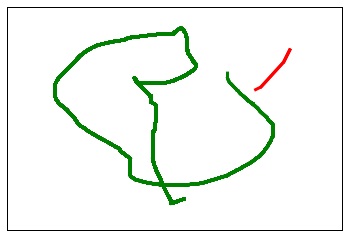

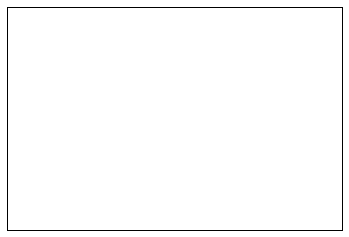

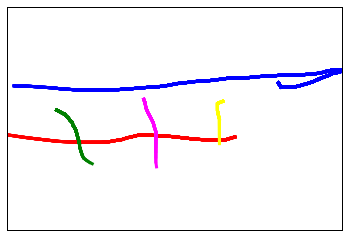

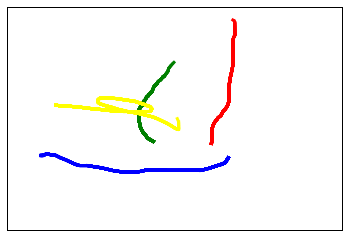

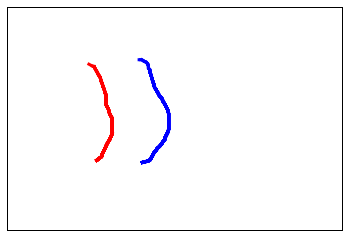

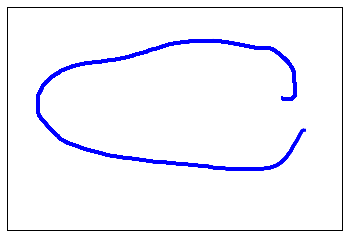

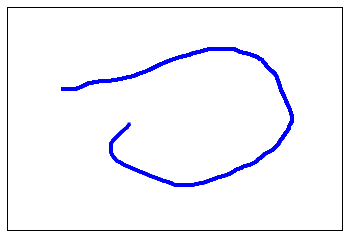

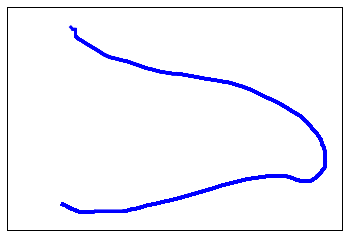

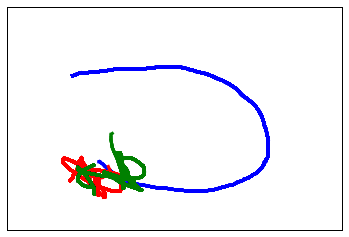

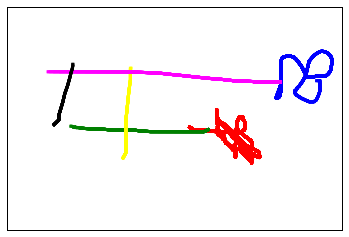

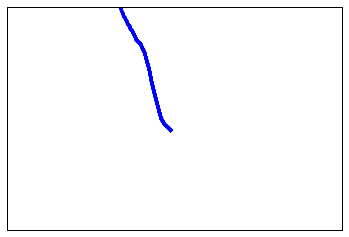

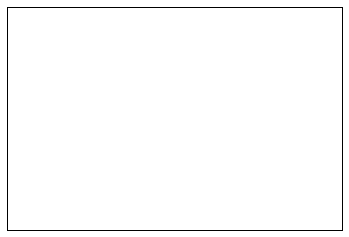

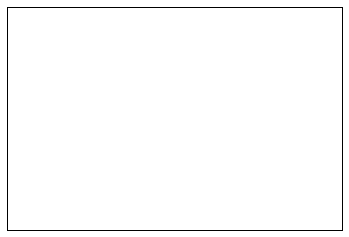

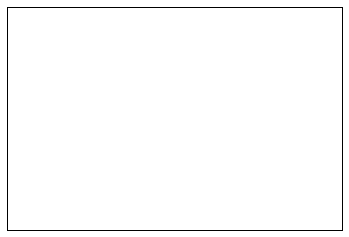

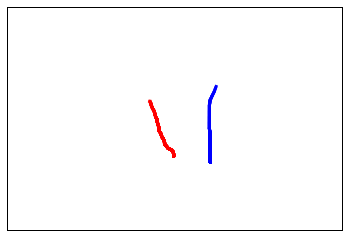

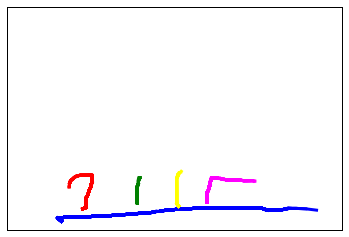

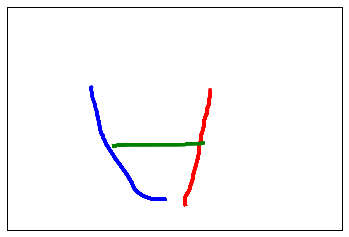

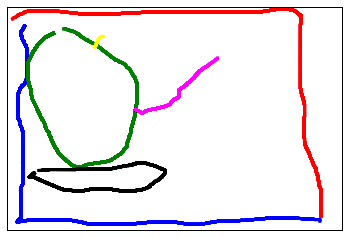

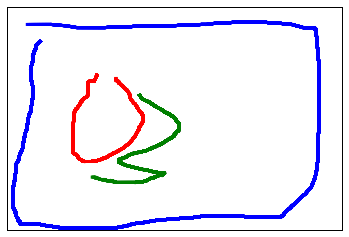

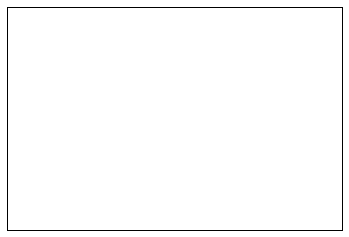

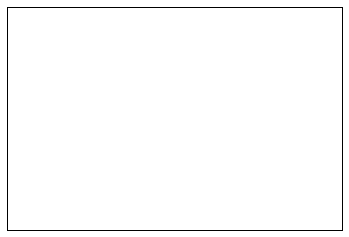

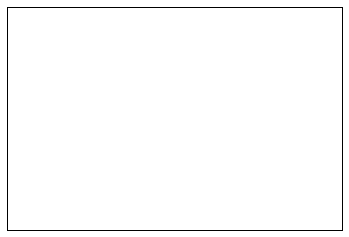

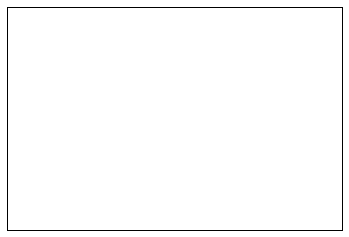

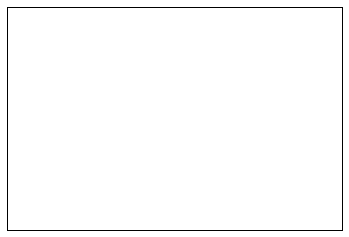

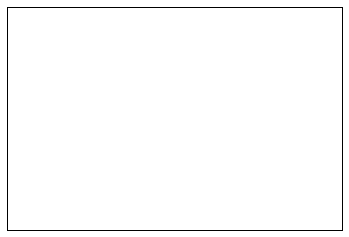

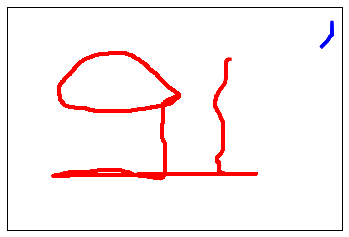

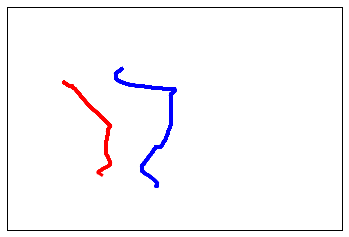

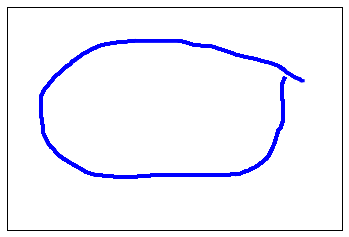

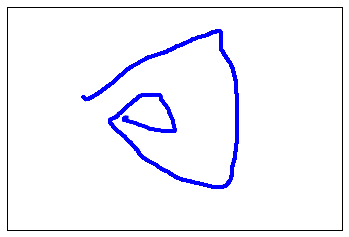

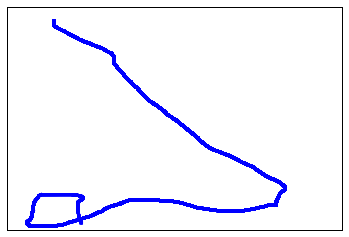

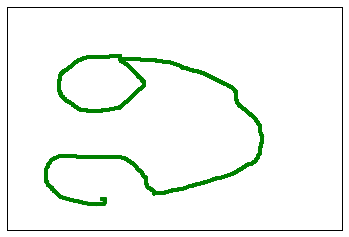

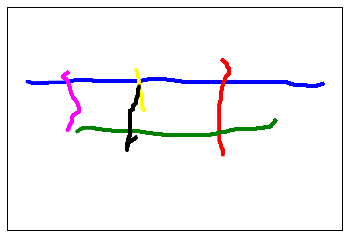

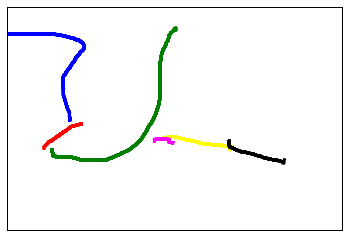

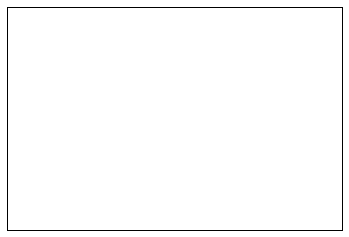

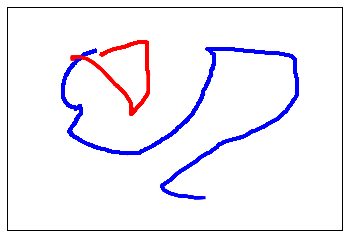

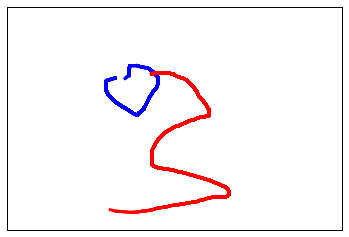

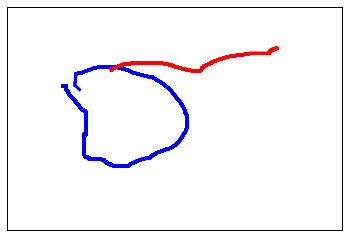

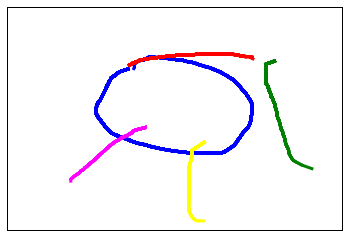

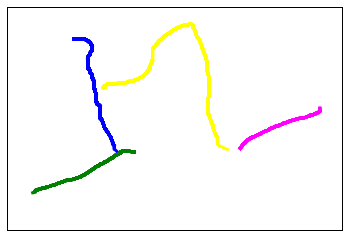

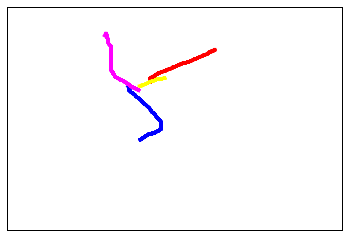

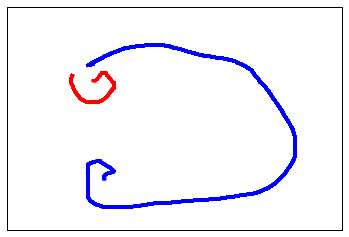

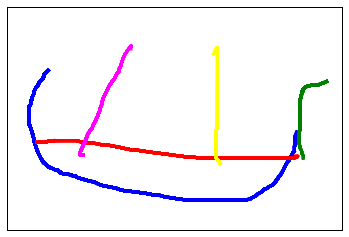

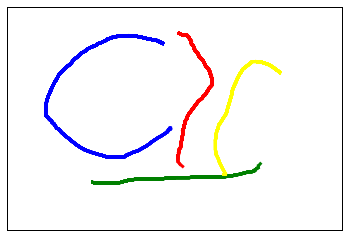

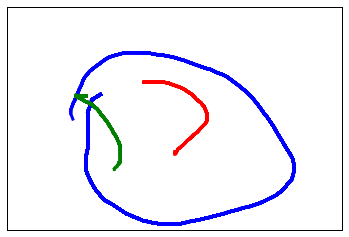

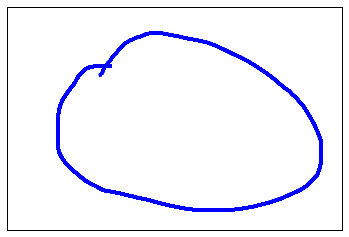

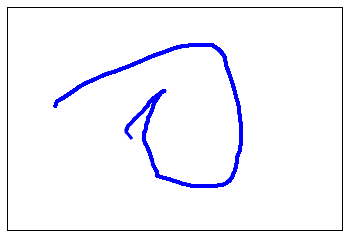

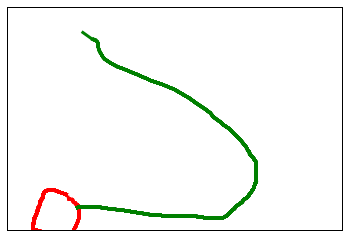

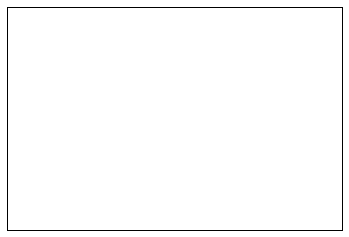

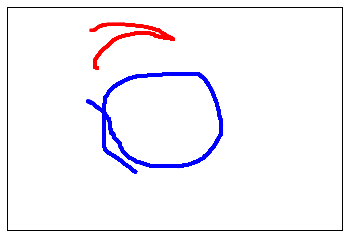

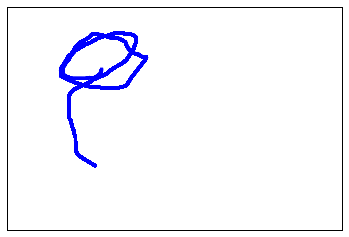

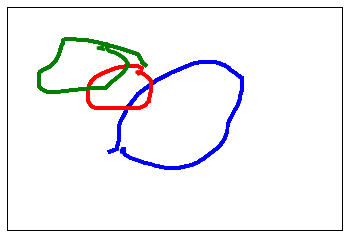

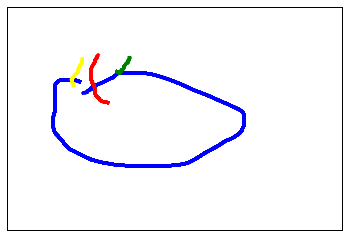

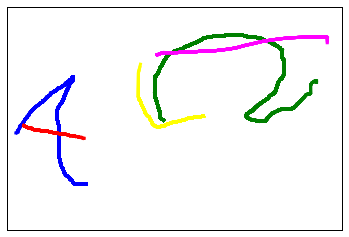

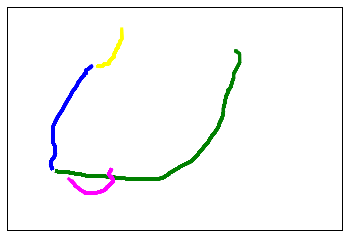

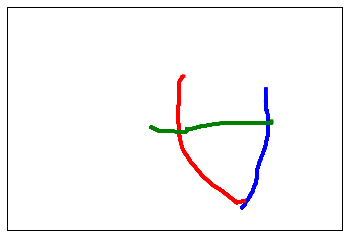

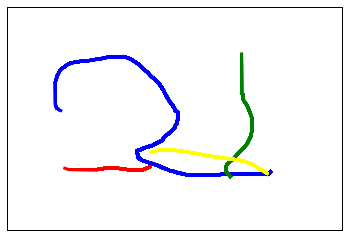

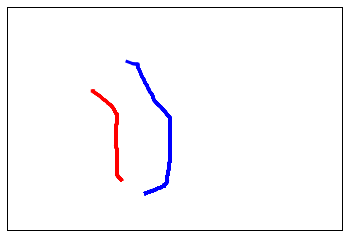

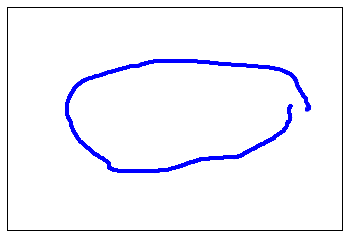

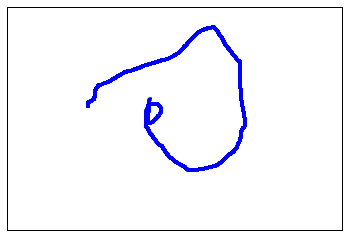

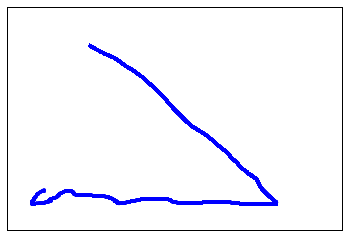

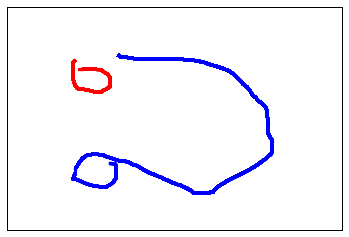

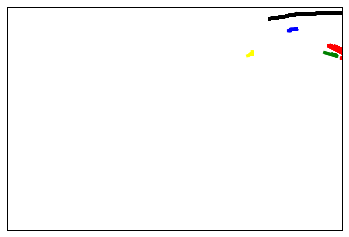

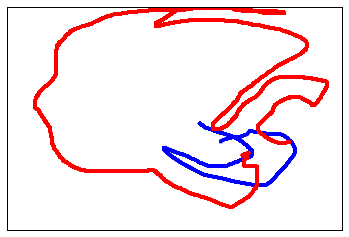

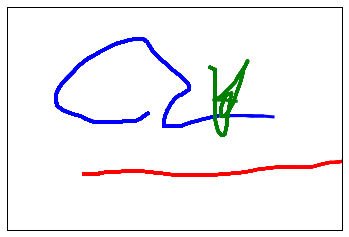

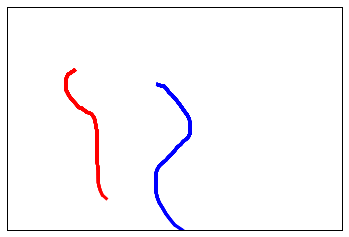

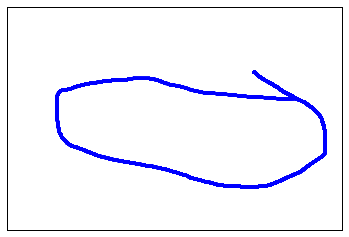

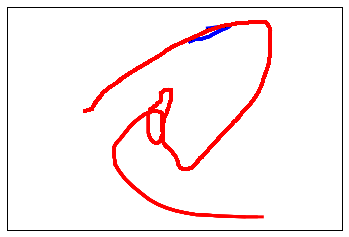

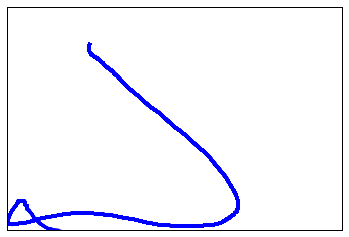

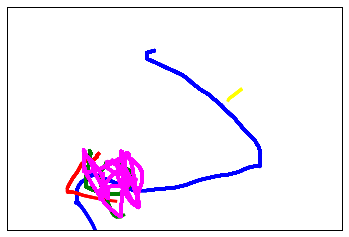

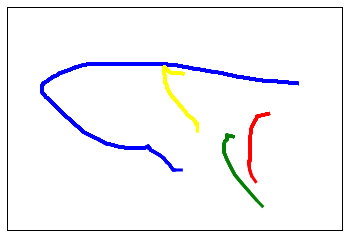

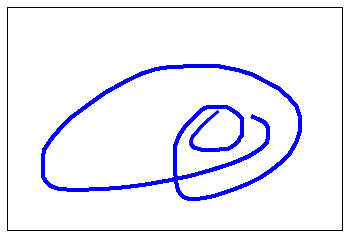

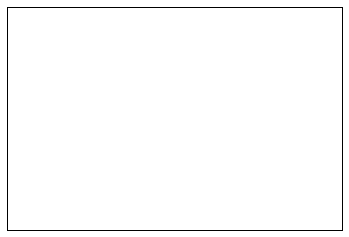

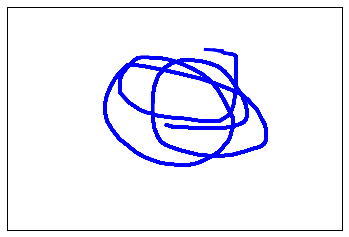

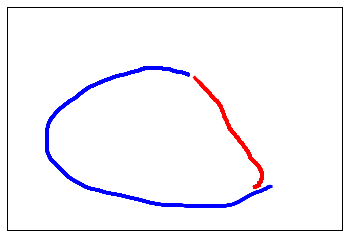

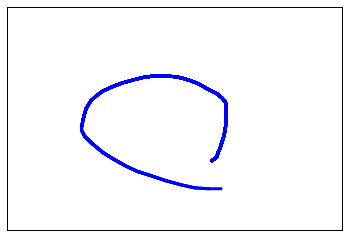

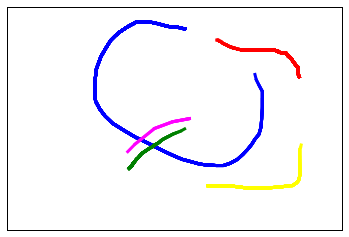

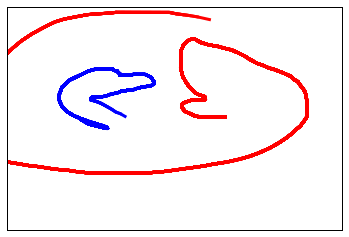

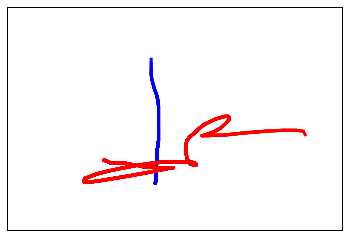

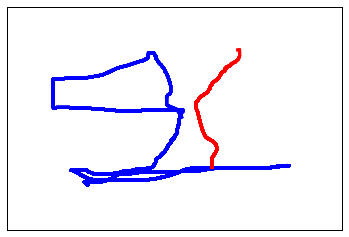

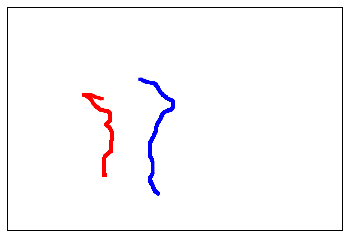

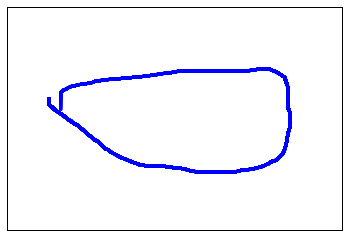

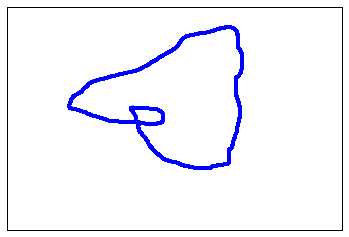

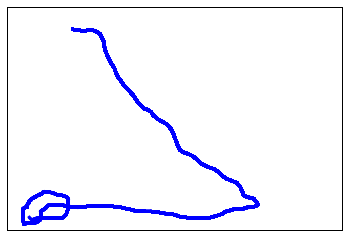

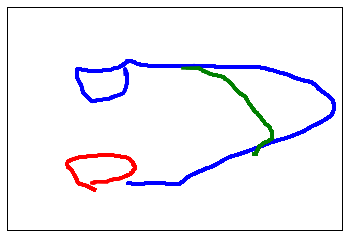

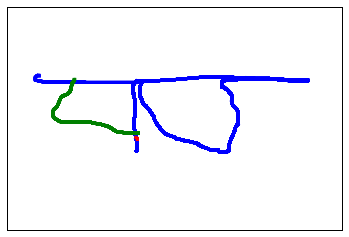

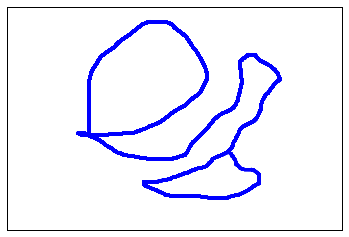

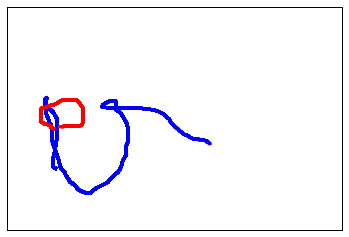

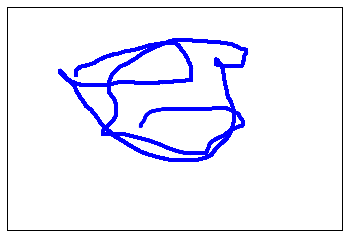

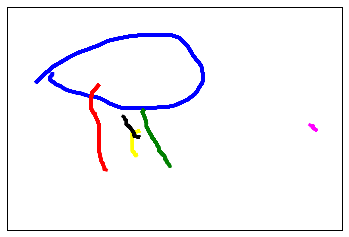

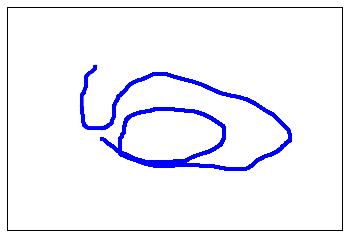

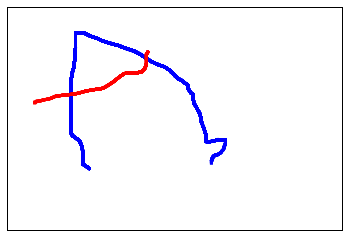

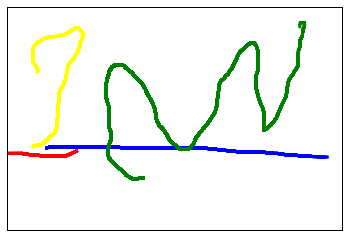

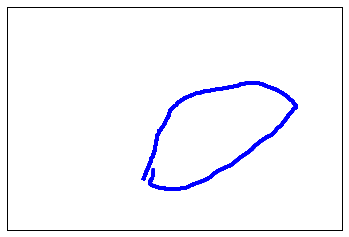

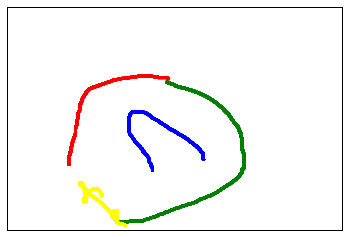

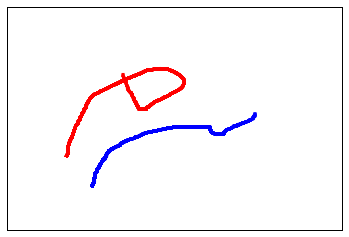

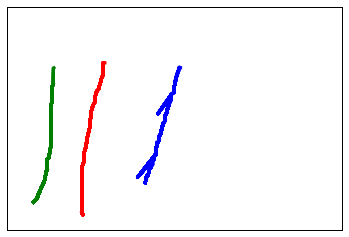

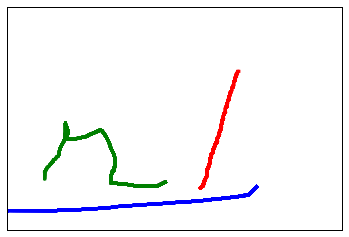

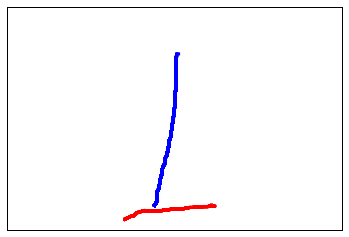

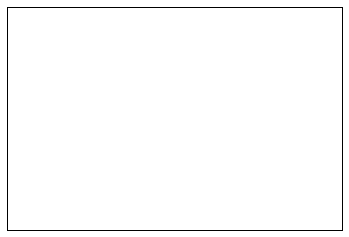

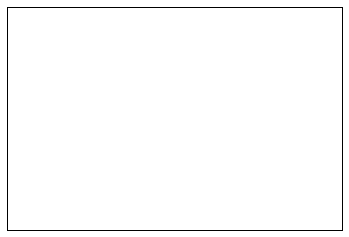

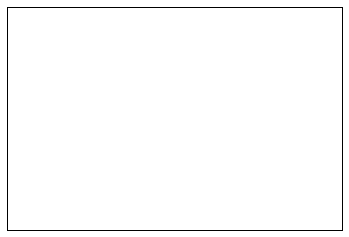

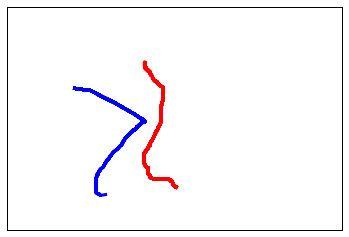

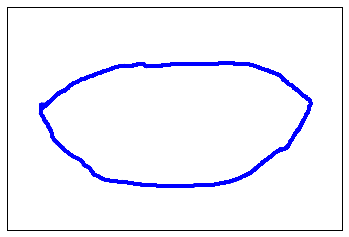

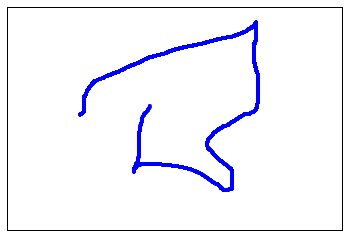

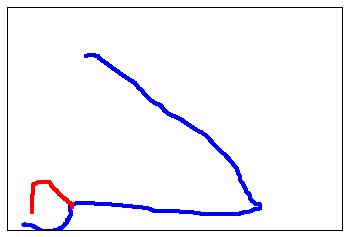

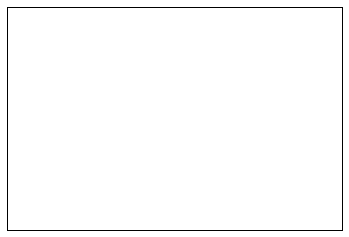

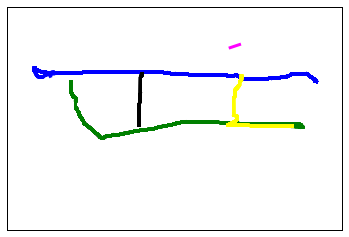

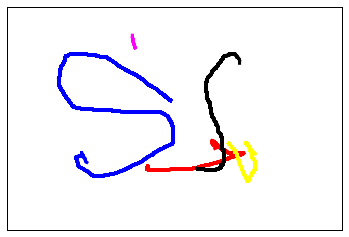

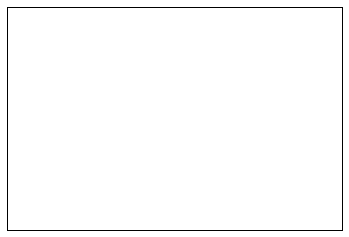

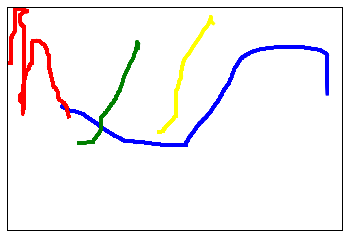

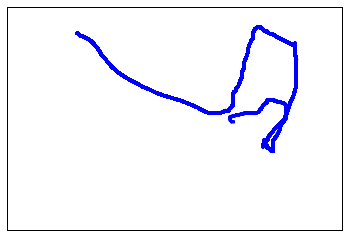

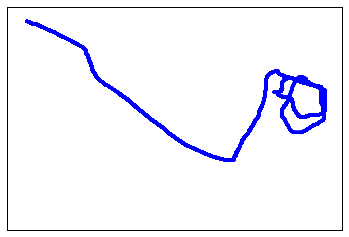

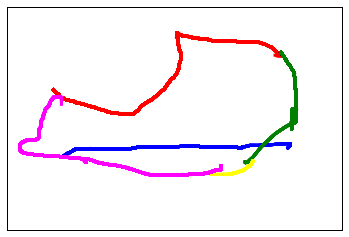

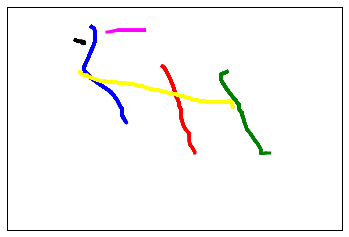

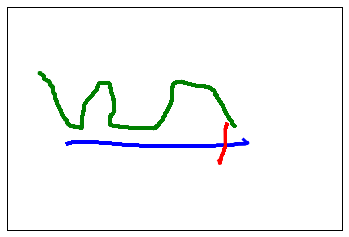

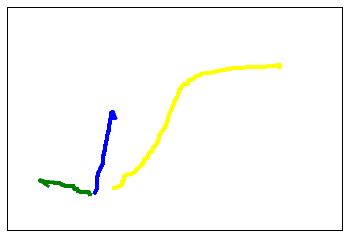

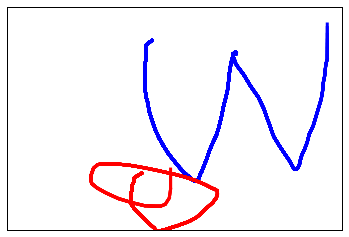

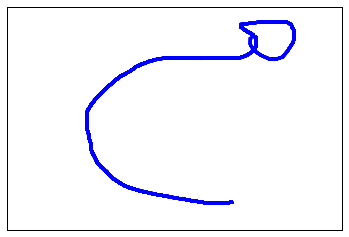

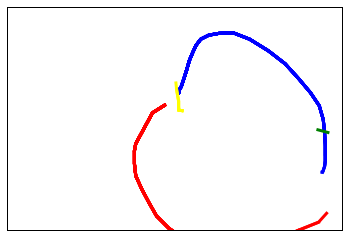

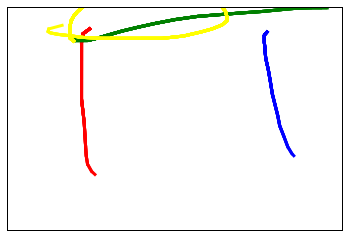

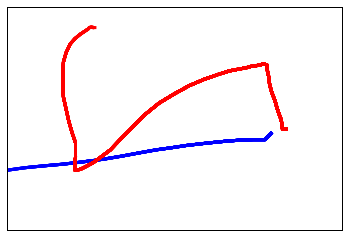

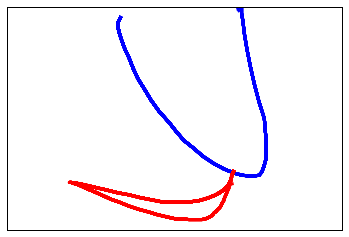

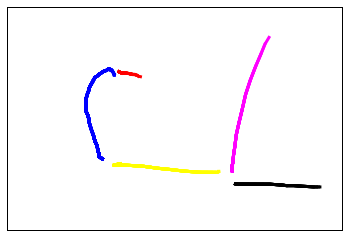

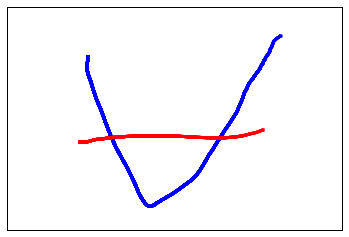

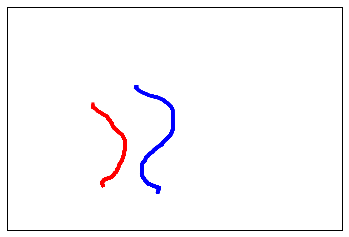

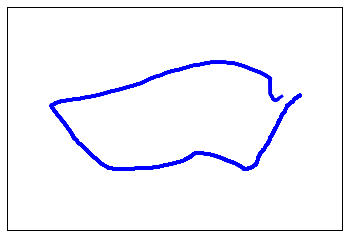

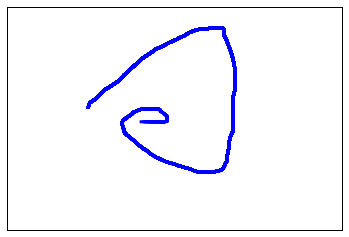

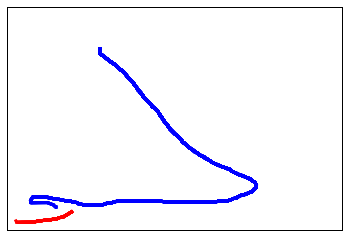

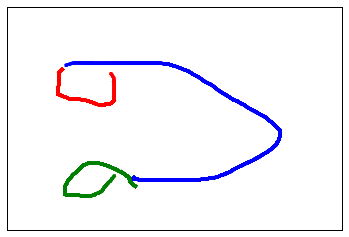

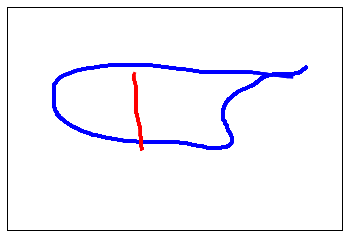

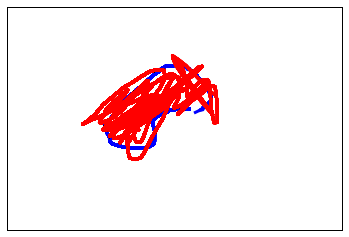

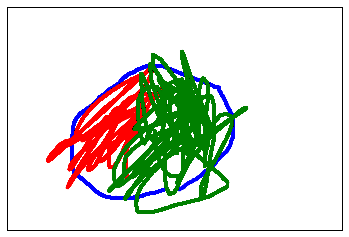

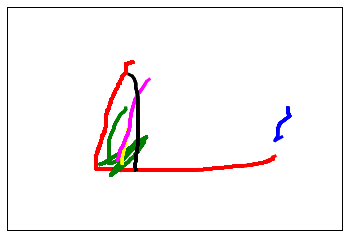

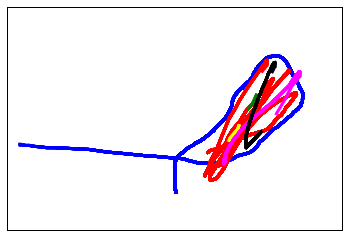

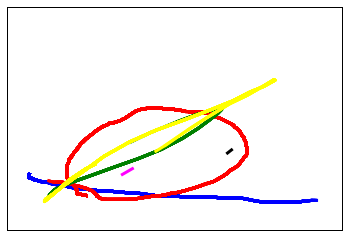

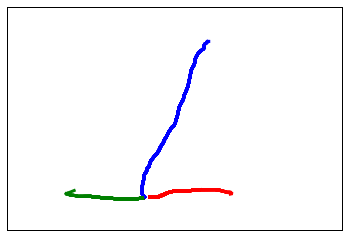

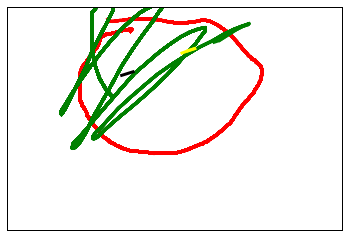

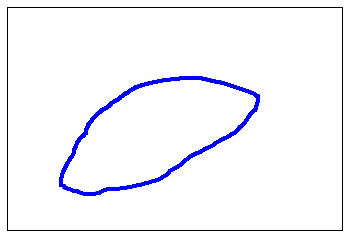

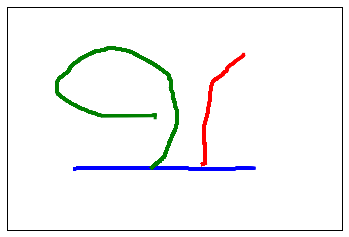

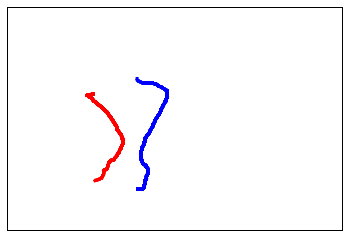

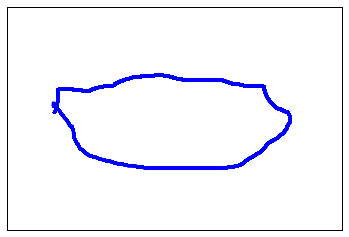

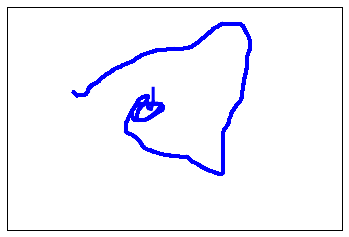

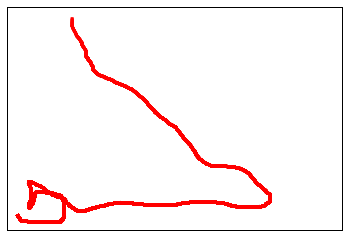

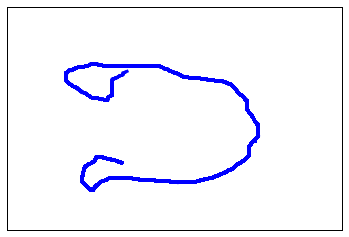

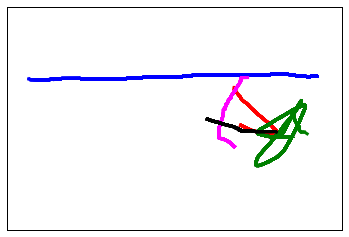

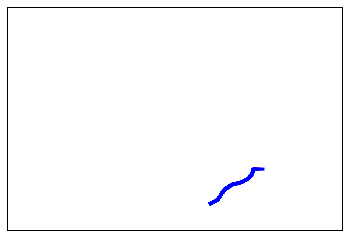

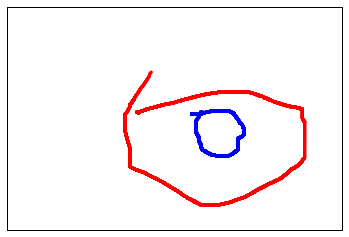

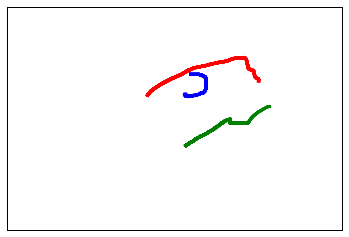

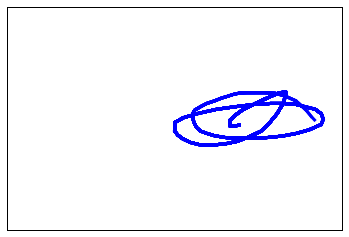

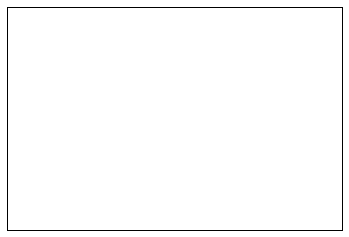

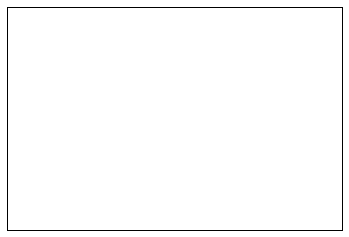

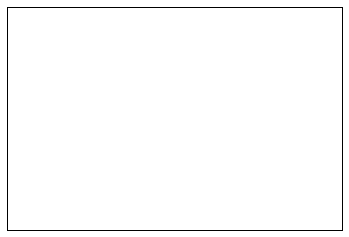

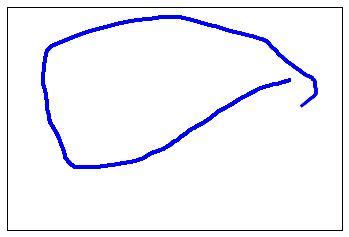

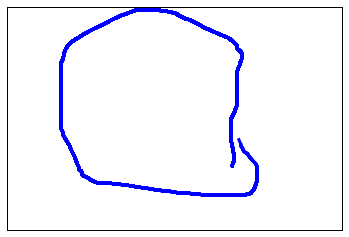

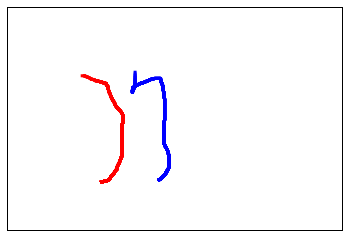

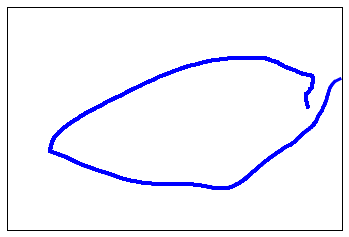

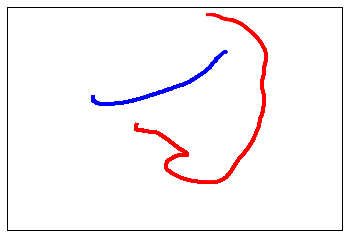

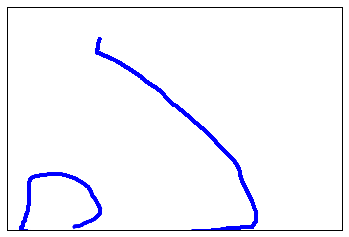

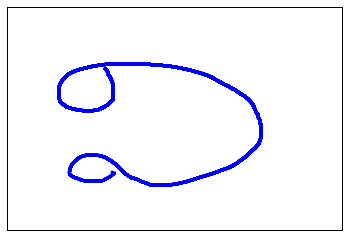

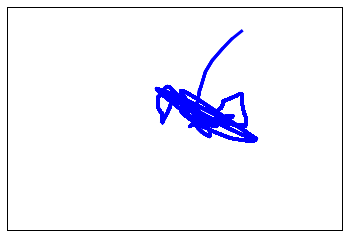

In [5]:
#Change number here 0-7 to get specific kids drawing also makeimage(d[7],<-- this number, 1st num
numOfPics = 8
for ci, childIndex in enumerate(os.listdir(allDataFolder)[0:]):
    print ci, childIndex
    for withinChildIterator in range(numOfPics):
        print withinChildIterator,
        try:
            withinChildOutputDirectory = outputFolder + "/" + \
                                         childIndex.split('.')[0] + \
                                         "/" + str(withinChildIterator) + "/"
            if os.path.isdir(withinChildOutputDirectory):
                shutil.rmtree(withinChildOutputDirectory)
            os.makedirs(withinChildOutputDirectory)
            fp = io.open(allDataFolder + "/" + childIndex)
            d = json.load(fp)
             
            # t = d[withinChildIterator][u'strokes'][0]  
    #         makeimage(d[withinChildIterator],
    #                   '/Users/cocosci/Dropbox (MIT)/LETTERS_JBT/Final expereiment/testek.png') 
            makeimage(d[withinChildIterator], withinChildOutputDirectory) 

            #Makes movie and gif

            #directoryToImages = "/Users/cocosci/Desktop/ray_out/"
            os.system("ffmpeg -framerate 30 -pattern_type glob -i '" + \
                      terminalUnfuck(withinChildOutputDirectory) + \
                       "*.png' -c:v libx264 -pix_fmt yuv420p " + 
                      terminalUnfuck(withinChildOutputDirectory) + "out.mp4")

            os.system("convert -delay 1.5 " + terminalUnfuck(withinChildOutputDirectory) +  \
                       "/*.png " + terminalUnfuck(withinChildOutputDirectory) + "tout.gif")
        except:
            ## sometimes files are missing watchagonnado move on
            pass